**ACTIVIDAD 1**

**Marco Eduardo Rodas Cardona A01701870**

# **ANALISIS DE REGRESIÓN LINEAL**
Ciudad de México

## **LIBRERÍAS**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **EXPLORACIÓN Y LIMPIEZA**

In [ ]:
df= pd.read_csv("listingsfinal.csv",encoding="ISO-8859-1")
#df['host_acceptance_rate '] = pd.to_numeric(df['host_acceptance_rate'])
#df = df.select_dtypes(include = ["number"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22948 non-null  float64
 1   listing_url                                   22948 non-null  object 
 2   scrape_id                                     22948 non-null  float64
 3   last_scraped                                  22948 non-null  object 
 4   source                                        22948 non-null  object 
 5   name                                          22945 non-null  object 
 6   description                                   21921 non-null  object 
 7   neighborhood_overview                         14532 non-null  object 
 8   picture_url                                   22948 non-null  object 
 9   host_id                                       22948 non-null 

In [ ]:
df['room_type'].unique()


array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
df2=df.copy()
df2=df2.fillna(round(df.mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
valores_nulos=df2.isnull().sum().sum()
valores_nulos


146647

AxesSubplot(0.125,0.125;0.775x0.755)


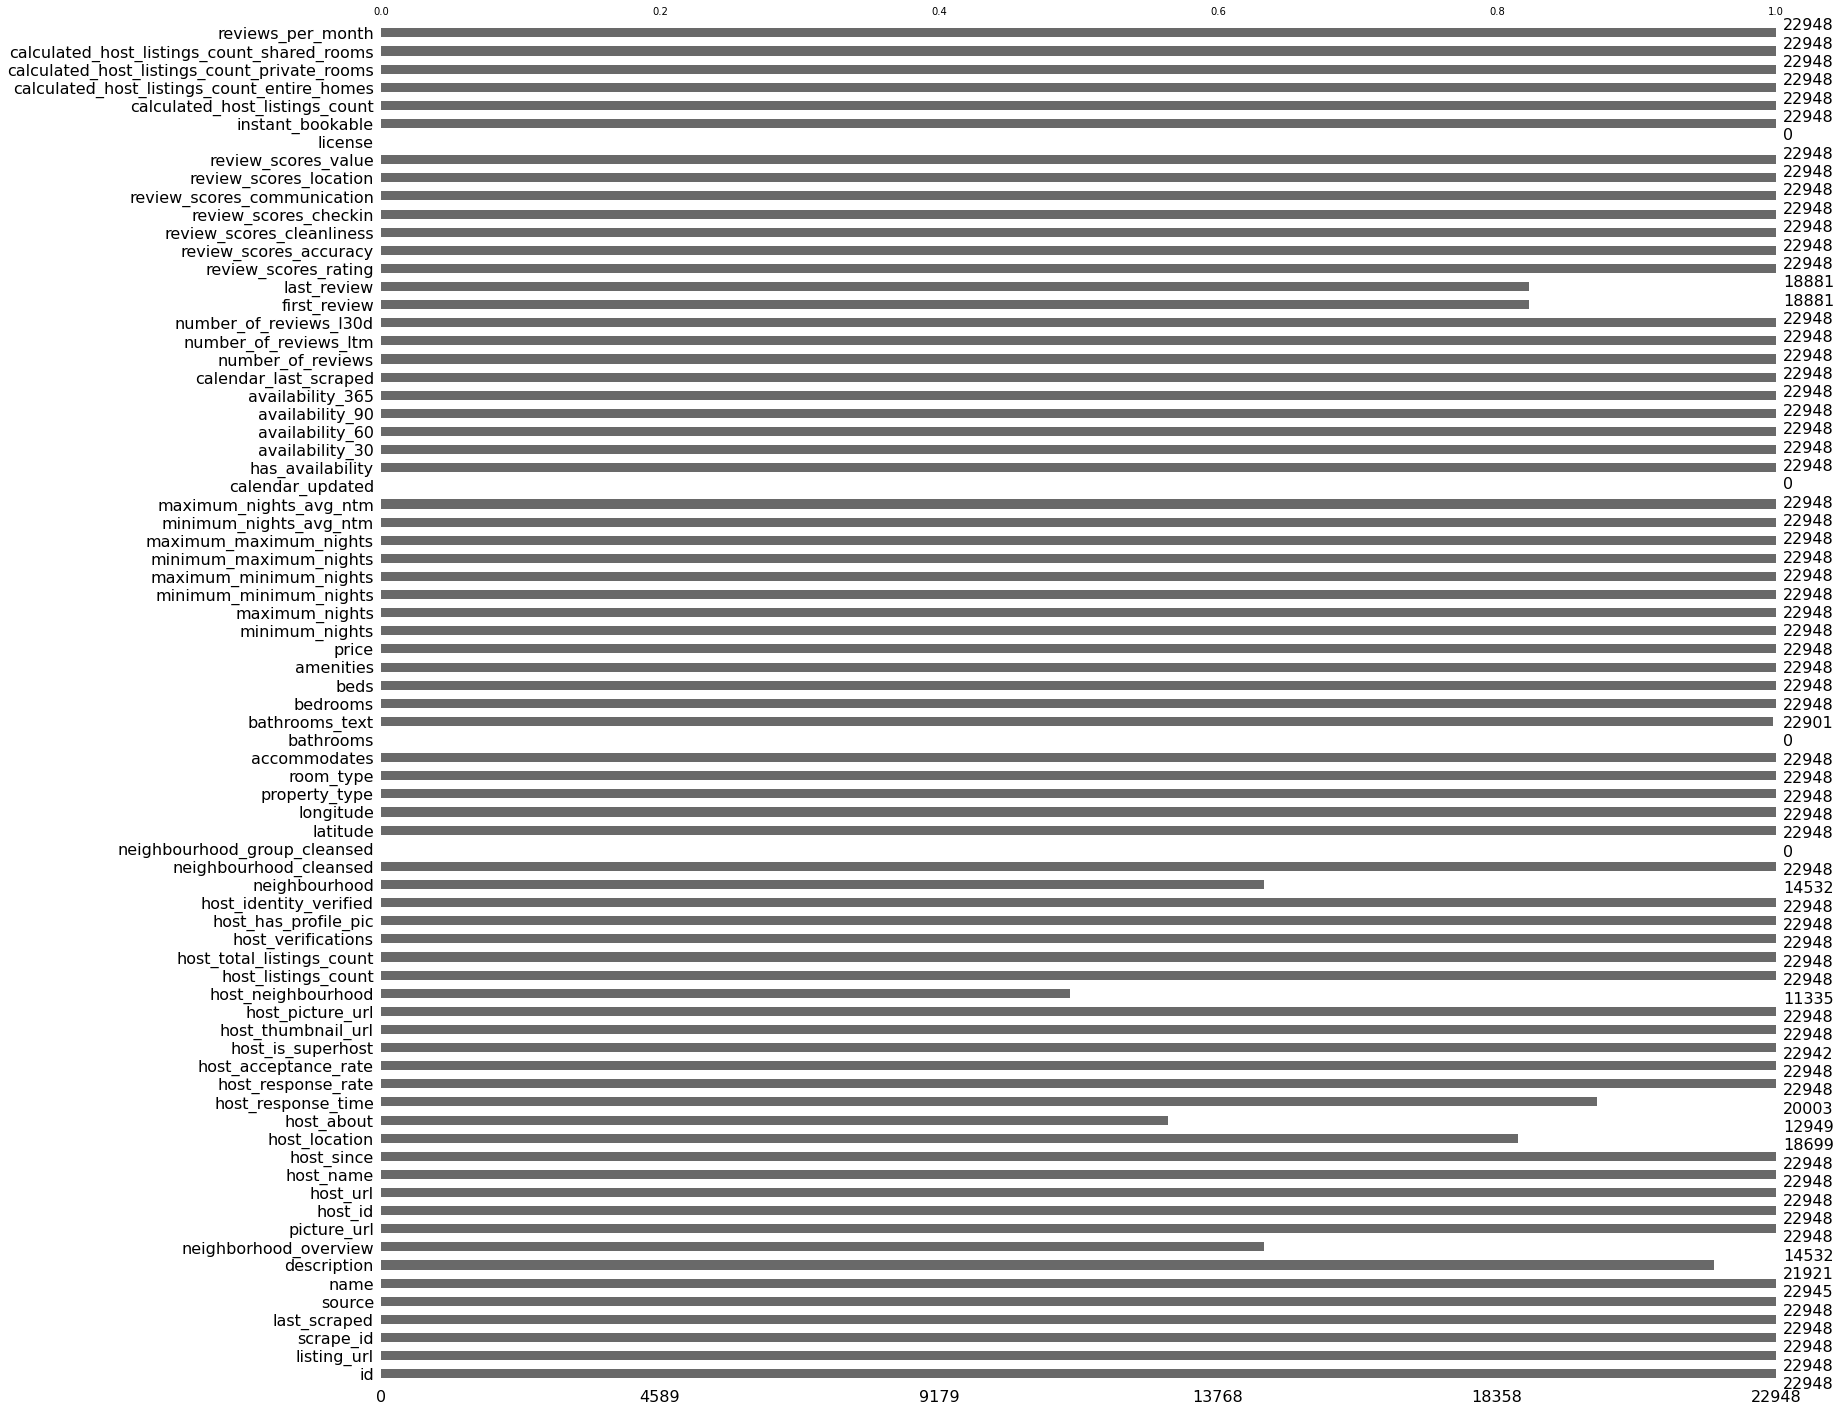

In [ ]:
print(msno.bar(df2))

## **ENTIRE HOME APT**

In [ ]:
df_clean=df2[df2['room_type']=='Entire home/apt']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14118 entries, 0 to 22947
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         14118 non-null  float64
 1   number_of_reviews            14118 non-null  int64  
 2   price                        14118 non-null  float64
 3   availability_365             14118 non-null  int64  
 4   review_scores_rating         14118 non-null  float64
 5   review_scores_cleanliness    14118 non-null  float64
 6   review_scores_communication  14118 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 882.4 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.315
number_of_reviews               250.500
price                          6173.500
availability_365               1295.500
review_scores_rating              6.020
review_scores_cleanliness         6.185
review_scores_communication       5.900
dtype: float64
Limite inferior permitido host_acceptance_rate              0.615
number_of_reviews              -199.500
price                         -3596.500
availability_365               -814.500
review_scores_rating              3.620
review_scores_cleanliness         3.485
review_scores_communication       3.900
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews   price  availability_365  \
0                      0.90                0.0  4001.0               363   
3                      0.79               58.0     NaN               331   
4                      1.00               61.0   740.0               314   
5                      0.92               76.0   650.0               354   
6                      1.00               51.0  1441.0               319   
...                     ...                ...     ...               ...   
22939                  0.93               78.0   550.0               349   
22942                  1.00               10.0   390.0               343   
22945                  1.00               28.0  5041.0               348   
22946                  0.99               72.0  1100.0               361   
22947                  0.99               40.0   959.0               352   

       review_scores_rating  review_scores_cleanliness  \
0                      4.70                       4.70   
3                      4.59                       4.70   
4                      4.85                       4.80   
5                      4.88                       4.92   
6                      4.45                       4.54   
...                     ...                        ...   
22939                  4.83                       4.82   
22942                  4.90                       4.90   
22945                  4.89                       4.96   
22946                  4.44                       4.64   
22947                  4.75                       4.80   

       review_scores_communication  
0                             4.80  
3                             4.75  
4                             4.95  
5                             4.93  
6                             4.72  
...                            ...  
22939                         4.88  
22942                         5.00  
22945                         4.93  
22946                         4.29  
22947                         4.48  

[14118 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

1937

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews   price  availability_365  \
0                      0.90                0.0  4001.0               363   
3                      0.79               58.0  1404.8               331   
4                      1.00               61.0   740.0               314   
5                      0.92               76.0   650.0               354   
6                      1.00               51.0  1441.0               319   
...                     ...                ...     ...               ...   
22939                  0.93               78.0   550.0               349   
22942                  1.00               10.0   390.0               343   
22945                  1.00               28.0  5041.0               348   
22946                  0.99               72.0  1100.0               361   
22947                  0.99               40.0   959.0               352   

       review_scores_rating  review_scores_cleanliness  \
0                      4.70                       4.70   
3                      4.59                       4.70   
4                      4.85                       4.80   
5                      4.88                       4.92   
6                      4.45                       4.54   
...                     ...                        ...   
22939                  4.83                       4.82   
22942                  4.90                       4.90   
22945                  4.89                       4.96   
22946                  4.44                       4.64   
22947                  4.75                       4.80   

       review_scores_communication  
0                             4.80  
3                             4.75  
4                             4.95  
5                             4.93  
6                             4.72  
...                            ...  
22939                         4.88  
22942                         5.00  
22945                         4.93  
22946                         4.29  
22947                         4.48  

[14118 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14118 entries, 0 to 22947
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         14118 non-null  float64
 1   number_of_reviews            14118 non-null  float64
 2   price                        14118 non-null  float64
 3   availability_365             14118 non-null  int64  
 4   review_scores_rating         14118 non-null  float64
 5   review_scores_cleanliness    14118 non-null  float64
 6   review_scores_communication  14118 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 882.4 KB


### **Regresión Lineal**



Text(0, 0.5, 'number_of_reviews')

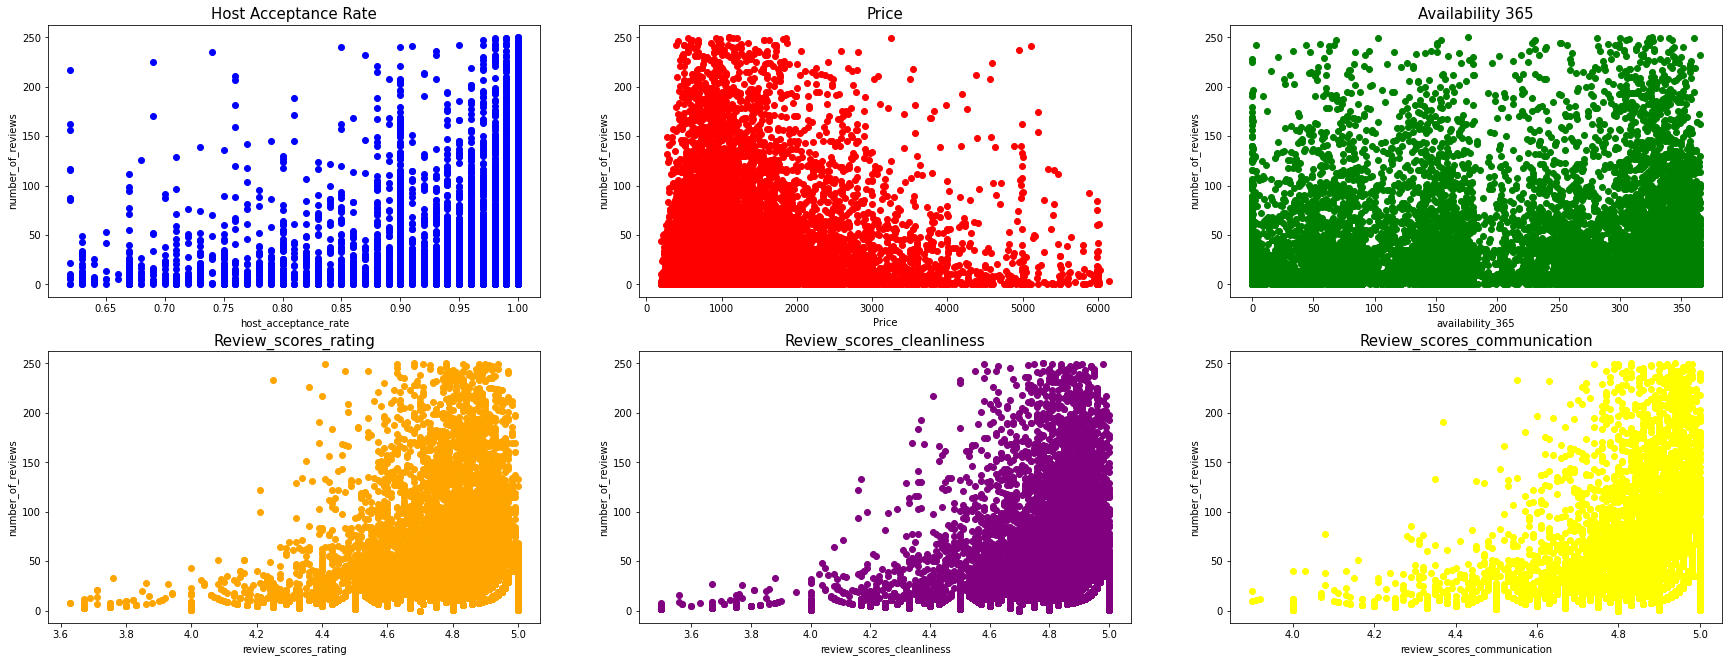

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)
ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=df_clean)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'number_of_reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=df_clean)
ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=df_clean)
ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)
ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)
ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate']]
Vars_Indep2= df[['price']]
Vars_Indep3= df[['availability_365']]
Vars_Indep4= df[['review_scores_rating']]
Vars_Indep5= df[['review_scores_cleanliness']]
Vars_Indep6= df[['review_scores_communication']]

Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model2= LinearRegression()
model3= LinearRegression()
model4= LinearRegression()
model5= LinearRegression()
model6= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep)
model3.fit(X=Vars_Indep3, y=Var_Dep)
model4.fit(X=Vars_Indep4, y=Var_Dep)
model5.fit(X=Vars_Indep5, y=Var_Dep)
model6.fit(X=Vars_Indep6, y=Var_Dep)

LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))
print('Modelo 2: ',model2.score(Vars_Indep2,Var_Dep))
print('Modelo 3: ',model3.score(Vars_Indep3,Var_Dep))
print('Modelo 4: ',model4.score(Vars_Indep4,Var_Dep))
print('Modelo 5: ',model5.score(Vars_Indep5,Var_Dep))
print('Modelo 6: ',model6.score(Vars_Indep6,Var_Dep))

Modelo 1:  0.011943766429632685
Modelo 2:  0.003922073071446874
Modelo 3:  0.004134752305747114
Modelo 4:  0.002663317282048716
Modelo 5:  0.006304434959466976
Modelo 6:  0.004913002330805161


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate']])
y_pred2= model2.predict(X=df[['price']])
y_pred3= model3.predict(X=df[['availability_365']])
y_pred4= model4.predict(X=df[['review_scores_rating']])
y_pred5= model5.predict(X=df[['review_scores_cleanliness']])
y_pred6= model6.predict(X=df[['review_scores_communication']])



In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)
df.insert(0, 'Predicciones2', y_pred2)
df.insert(0, 'Predicciones3', y_pred3)
df.insert(0, 'Predicciones4', y_pred4)
df.insert(0, 'Predicciones5', y_pred5)
df.insert(0, 'Predicciones6', y_pred6)

df

Predicciones6  Predicciones5  Predicciones4  Predicciones3  \
0          33.314782      33.030287      33.717128      31.524709   
3          32.343635      33.030287      32.461933      32.316315   
4          36.228225      34.700823      35.428757      32.736855   
5          35.839766      36.705466      35.771083      31.747348   
6          31.760946      30.357430      30.864413      32.613167   
...              ...            ...            ...            ...   
22939      34.868618      35.034931      35.200540      31.871036   
22942      37.199372      36.371359      35.999300      32.019462   
22945      35.839766      37.373681      35.885191      31.895774   
22946      23.409078      32.027966      30.750304      31.574184   
22947      27.099438      34.700823      34.287671      31.796823   

       Predicciones2  Predicciones1  host_acceptance_rate  number_of_reviews  \
0          26.278321      29.546035                  0.90                0.0   
3          34.627665      20.915147                  0.79               58.0   
4          36.765653      37.392297                  1.00               61.0   
5          37.055092      31.115287                  0.92               76.0   
6          34.511246      37.392297                  1.00               51.0   
...              ...            ...                   ...                ...   
22939      37.376691      31.899913                  0.93               78.0   
22942      37.891248      37.392297                  1.00               10.0   
22945      22.933695      37.392297                  1.00               28.0   
22946      35.607898      36.607671                  0.99               72.0   
22947      36.061352      36.607671                  0.99               40.0   

        price  availability_365  review_scores_rating  \
0      4001.0               363                  4.70   
3      1404.8               331                  4.59   
4       740.0               314                  4.85   
5       650.0               354                  4.88   
6      1441.0               319                  4.45   
...       ...               ...                   ...   
22939   550.0               349                  4.83   
22942   390.0               343                  4.90   
22945  5041.0               348                  4.89   
22946  1100.0               361                  4.44   
22947   959.0               352                  4.75   

       review_scores_cleanliness  review_scores_communication  
0                           4.70                         4.80  
3                           4.70                         4.75  
4                           4.80                         4.95  
5                           4.92                         4.93  
6                           4.54                         4.72  
...                          ...                          ...  
22939                       4.82                         4.88  
22942                       4.90                         5.00  
22945                       4.96                         4.93  
22946                       4.64                         4.29  
22947                       4.80                         4.48  

[14118 rows x 13 columns]

Text(0, 0.5, 'number_of_reviews')

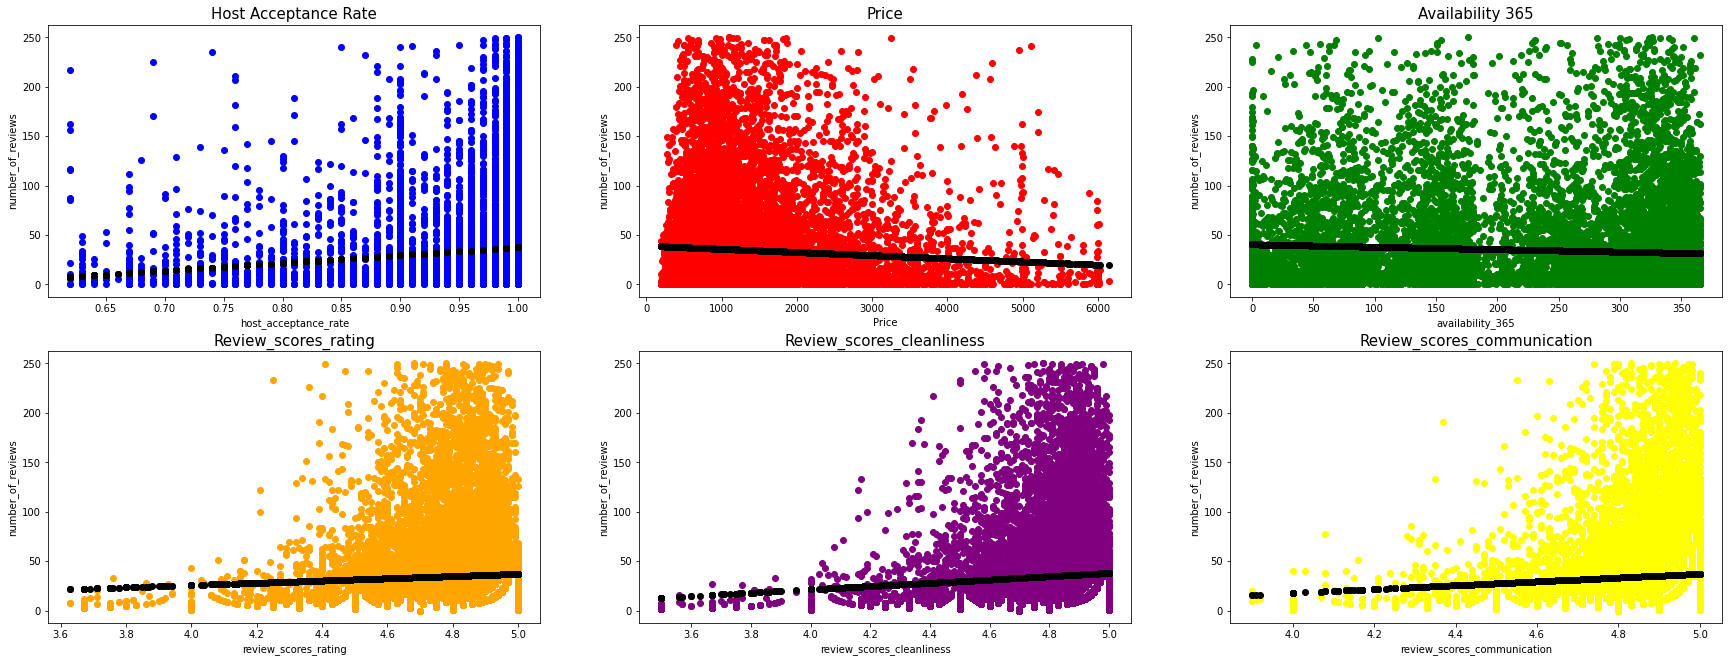

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=df)
ax2.scatter(x='price', y='Predicciones2', color="black", data=df)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'number_of_reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=df)
ax3.scatter(x='availability_365', y='Predicciones3', color="black", data=df)

ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=df)
ax4.scatter(x='review_scores_rating', y='Predicciones4', color="black", data=df)

ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df)
ax5.scatter(x='review_scores_cleanliness', y='Predicciones5', color="black", data=df)

ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df)
ax6.scatter(x='review_scores_communication', y='Predicciones6', color="black", data=df)

ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep)
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep)
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep)
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep)
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep)
print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)
print('Modelo 2: ',coef_Deter2)
print('Modelo 3: ',coef_Deter3)
print('Modelo 4: ',coef_Deter4)
print('Modelo 5: ',coef_Deter5)
print('Modelo 6: ',coef_Deter6)

Coeficientes de determinación
Modelo 1:  0.011943766429632685
Modelo 2:  0.003922073071446874
Modelo 3:  0.004134752305747114
Modelo 4:  0.002663317282048716
Modelo 5:  0.006304434959466976
Modelo 6:  0.004913002330805161


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl6=np.sqrt(coef_Deter6)
print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)
print('Modelo 2: ',coef_Correl2)
print('Modelo 3: ',coef_Correl3)
print('Modelo 4: ',coef_Correl4)
print('Modelo 5: ',coef_Correl5)
print('Modelo 6: ',coef_Correl6)

Coeficientes de correlación
Modelo 1:  0.10928754013899611
Modelo 2:  0.06262645664131793
Modelo 3:  0.06430203967019331
Modelo 4:  0.05160733748265566
Modelo 5:  0.07940047203554255
Modelo 6:  0.07009281226206551


## **PRIVATE ROOM**

In [ ]:
df_clean=df2[df2['room_type']=='Private room']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 22944
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         8316 non-null   float64
 1   number_of_reviews            8316 non-null   int64  
 2   price                        8316 non-null   float64
 3   availability_365             8316 non-null   int64  
 4   review_scores_rating         8316 non-null   float64
 5   review_scores_cleanliness    8316 non-null   float64
 6   review_scores_communication  8316 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 519.8 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.450
number_of_reviews               110.000
price                          2573.875
availability_365               1315.000
review_scores_rating              6.185
review_scores_cleanliness         6.350
review_scores_communication       5.900
dtype: float64
Limite inferior permitido host_acceptance_rate              0.450
number_of_reviews               -90.000
price                         -1478.625
availability_365               -805.000
review_scores_rating              3.485
review_scores_cleanliness         3.350
review_scores_communication       3.900
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews   price  availability_365  \
1                      1.00               27.0   500.0               363   
2                      0.67                NaN   599.0               323   
8                      0.79               58.0  1198.0               175   
16                     0.90                0.0  1360.0                88   
18                     0.62                NaN   440.0               297   
...                     ...                ...     ...               ...   
22937                  0.90                0.0   500.0               365   
22938                  1.00                9.0   210.0               365   
22940                  1.00                0.0   899.0               179   
22941                  0.97               25.0   400.0               365   
22944                  0.90                3.0   750.0                89   

       review_scores_rating  review_scores_cleanliness  \
1                      4.96                       4.93   
2                      4.73                       4.70   
8                      4.91                       4.91   
16                     4.70                       4.70   
18                     4.73                       4.67   
...                     ...                        ...   
22937                  4.70                       4.70   
22938                  4.89                       4.78   
22940                  4.70                       4.70   
22941                  4.56                       4.60   
22944                  5.00                       5.00   

       review_scores_communication  
1                             4.93  
2                             4.91  
8                             4.95  
16                            4.80  
18                            4.92  
...                            ...  
22937                         4.80  
22938                         5.00  
22940                         4.80  
22941                         4.84  
22944                         5.00  

[8316 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

2154

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews   price  availability_365  \
1                      1.00               27.0   500.0               363   
2                      0.67               13.4   599.0               323   
8                      0.79               58.0  1198.0               175   
16                     0.90                0.0  1360.0                88   
18                     0.62               13.4   440.0               297   
...                     ...                ...     ...               ...   
22937                  0.90                0.0   500.0               365   
22938                  1.00                9.0   210.0               365   
22940                  1.00                0.0   899.0               179   
22941                  0.97               25.0   400.0               365   
22944                  0.90                3.0   750.0                89   

       review_scores_rating  review_scores_cleanliness  \
1                      4.96                       4.93   
2                      4.73                       4.70   
8                      4.91                       4.91   
16                     4.70                       4.70   
18                     4.73                       4.67   
...                     ...                        ...   
22937                  4.70                       4.70   
22938                  4.89                       4.78   
22940                  4.70                       4.70   
22941                  4.56                       4.60   
22944                  5.00                       5.00   

       review_scores_communication  
1                             4.93  
2                             4.91  
8                             4.95  
16                            4.80  
18                            4.92  
...                            ...  
22937                         4.80  
22938                         5.00  
22940                         4.80  
22941                         4.84  
22944                         5.00  

[8316 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 22944
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         8316 non-null   float64
 1   number_of_reviews            8316 non-null   float64
 2   price                        8316 non-null   float64
 3   availability_365             8316 non-null   int64  
 4   review_scores_rating         8316 non-null   float64
 5   review_scores_cleanliness    8316 non-null   float64
 6   review_scores_communication  8316 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 519.8 KB


Text(0.5, 1.0, 'Correlation Heatmap')

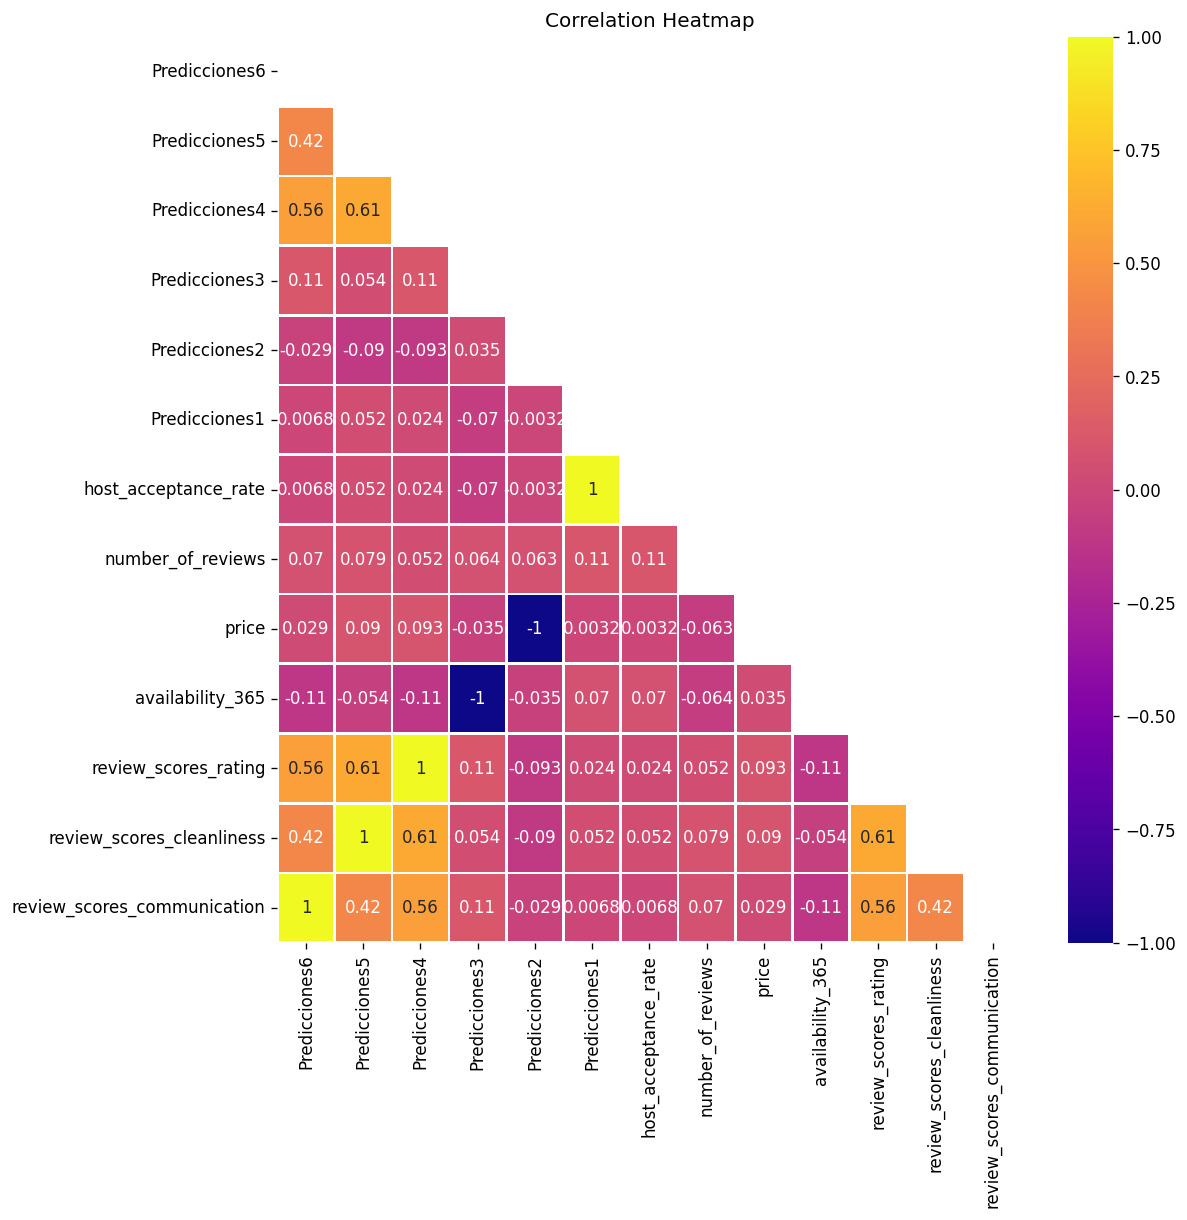

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

### **Regresión Lineal**



Text(0, 0.5, 'number_of_reviews')

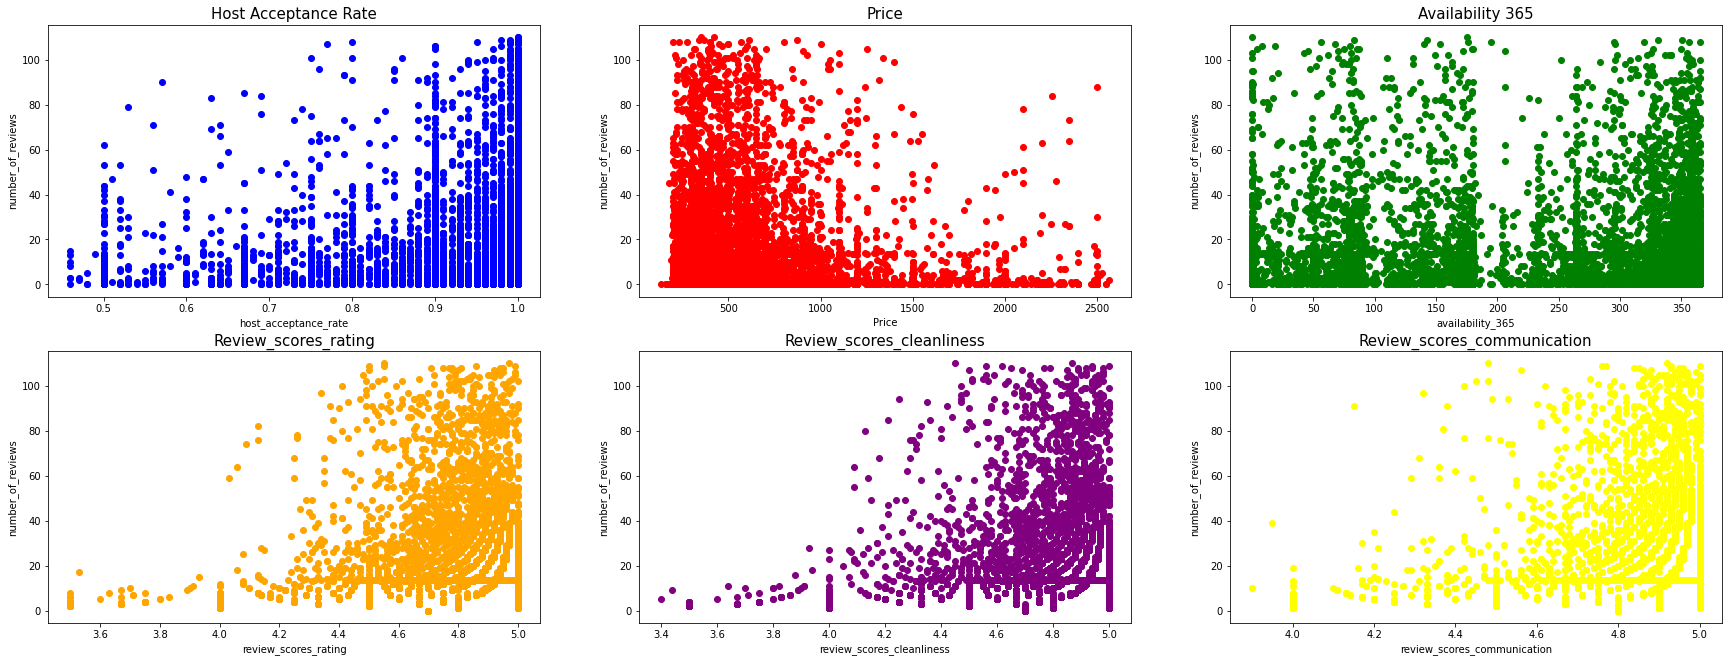

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)
ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=df_clean)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'number_of_reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=df_clean)
ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=df_clean)
ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)
ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)
ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate']]
Vars_Indep2= df[['price']]
Vars_Indep3= df[['availability_365']]
Vars_Indep4= df[['review_scores_rating']]
Vars_Indep5= df[['review_scores_cleanliness']]
Vars_Indep6= df[['review_scores_communication']]

Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model2= LinearRegression()
model3= LinearRegression()
model4= LinearRegression()
model5= LinearRegression()
model6= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep)
model3.fit(X=Vars_Indep3, y=Var_Dep)
model4.fit(X=Vars_Indep4, y=Var_Dep)
model5.fit(X=Vars_Indep5, y=Var_Dep)
model6.fit(X=Vars_Indep6, y=Var_Dep)

LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))
print('Modelo 2: ',model2.score(Vars_Indep2,Var_Dep))
print('Modelo 3: ',model3.score(Vars_Indep3,Var_Dep))
print('Modelo 4: ',model4.score(Vars_Indep4,Var_Dep))
print('Modelo 5: ',model5.score(Vars_Indep5,Var_Dep))
print('Modelo 6: ',model6.score(Vars_Indep6,Var_Dep))

Modelo 1:  0.017699106857115177
Modelo 2:  0.0047635291563492554
Modelo 3:  0.009095157853566405
Modelo 4:  0.005204271391699988
Modelo 5:  0.00708562986696315
Modelo 6:  0.00275336647171176


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate']])
y_pred2= model2.predict(X=df[['price']])
y_pred3= model3.predict(X=df[['availability_365']])
y_pred4= model4.predict(X=df[['review_scores_rating']])
y_pred5= model5.predict(X=df[['review_scores_cleanliness']])
y_pred6= model6.predict(X=df[['review_scores_communication']])



In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)
df.insert(0, 'Predicciones2', y_pred2)
df.insert(0, 'Predicciones3', y_pred3)
df.insert(0, 'Predicciones4', y_pred4)
df.insert(0, 'Predicciones5', y_pred5)
df.insert(0, 'Predicciones6', y_pred6)

df

Predicciones6  Predicciones5  Predicciones4  Predicciones3  \
1          13.832860      14.565093      14.637192      11.566264   
2          13.707210      12.833933      13.136428      12.210952   
8          13.958509      14.414558      14.310939      14.596299   
16         13.016138      12.833933      12.940676      15.998496   
18         13.770035      12.608130      13.136428      12.630000   
...              ...            ...            ...            ...   
22937      13.016138      12.833933      12.940676      11.534029   
22938      14.272633      13.436076      14.180437      11.534029   
22940      13.016138      12.833933      12.940676      14.531830   
22941      13.267437      12.081255      12.027168      11.534029   
22944      14.272633      15.091968      14.898194      15.982379   

       Predicciones2  Predicciones1  host_acceptance_rate  number_of_reviews  \
1          13.698094      15.298437                  1.00               27.0   
2          13.337354       7.034282                  0.67               13.4   
8          11.154694      10.039429                  0.79               58.0   
16         10.564392      12.794148                  0.90                0.0   
18         13.916725       5.782137                  0.62               13.4   
...              ...            ...                   ...                ...   
22937      13.698094      12.794148                  0.90                0.0   
22938      14.754808      15.298437                  1.00                9.0   
22940      12.244202      15.298437                  1.00                0.0   
22941      14.062478      14.547150                  0.97               25.0   
22944      12.787134      12.794148                  0.90                3.0   

        price  availability_365  review_scores_rating  \
1       500.0               363                  4.96   
2       599.0               323                  4.73   
8      1198.0               175                  4.91   
16     1360.0                88                  4.70   
18      440.0               297                  4.73   
...       ...               ...                   ...   
22937   500.0               365                  4.70   
22938   210.0               365                  4.89   
22940   899.0               179                  4.70   
22941   400.0               365                  4.56   
22944   750.0                89                  5.00   

       review_scores_cleanliness  review_scores_communication  
1                           4.93                         4.93  
2                           4.70                         4.91  
8                           4.91                         4.95  
16                          4.70                         4.80  
18                          4.67                         4.92  
...                          ...                          ...  
22937                       4.70                         4.80  
22938                       4.78                         5.00  
22940                       4.70                         4.80  
22941                       4.60                         4.84  
22944                       5.00                         5.00  

[8316 rows x 13 columns]

Text(0, 0.5, 'number_of_reviews')

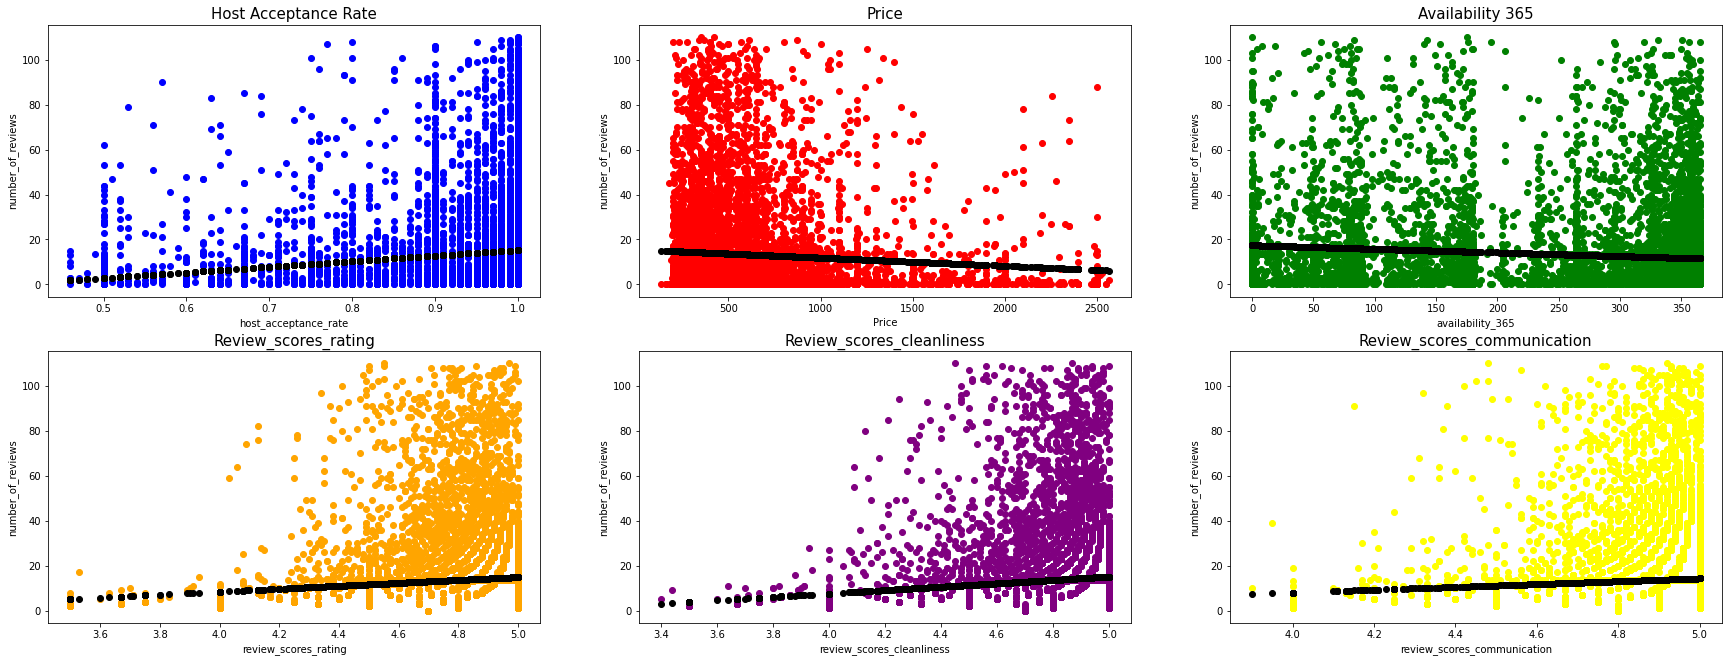

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=df)
ax2.scatter(x='price', y='Predicciones2', color="black", data=df)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'number_of_reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=df)
ax3.scatter(x='availability_365', y='Predicciones3', color="black", data=df)

ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=df)
ax4.scatter(x='review_scores_rating', y='Predicciones4', color="black", data=df)

ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df)
ax5.scatter(x='review_scores_cleanliness', y='Predicciones5', color="black", data=df)

ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df)
ax6.scatter(x='review_scores_communication', y='Predicciones6', color="black", data=df)

ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep)
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep)
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep)
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep)
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep)
print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)
print('Modelo 2: ',coef_Deter2)
print('Modelo 3: ',coef_Deter3)
print('Modelo 4: ',coef_Deter4)
print('Modelo 5: ',coef_Deter5)
print('Modelo 6: ',coef_Deter6)

Coeficientes de determinación
Modelo 1:  0.017699106857115177
Modelo 2:  0.0047635291563492554
Modelo 3:  0.009095157853566405
Modelo 4:  0.005204271391699988
Modelo 5:  0.00708562986696315
Modelo 6:  0.00275336647171176


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl6=np.sqrt(coef_Deter6)
print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)
print('Modelo 2: ',coef_Correl2)
print('Modelo 3: ',coef_Correl3)
print('Modelo 4: ',coef_Correl4)
print('Modelo 5: ',coef_Correl5)
print('Modelo 6: ',coef_Correl6)

Coeficientes de correlación
Modelo 1:  0.13303799027764654
Modelo 2:  0.06901832478660472
Modelo 3:  0.09536853702121263
Modelo 4:  0.07214063620248984
Modelo 5:  0.08417618349012475
Modelo 6:  0.05247253063948565


Text(0.5, 1.0, 'Correlation Heatmap')

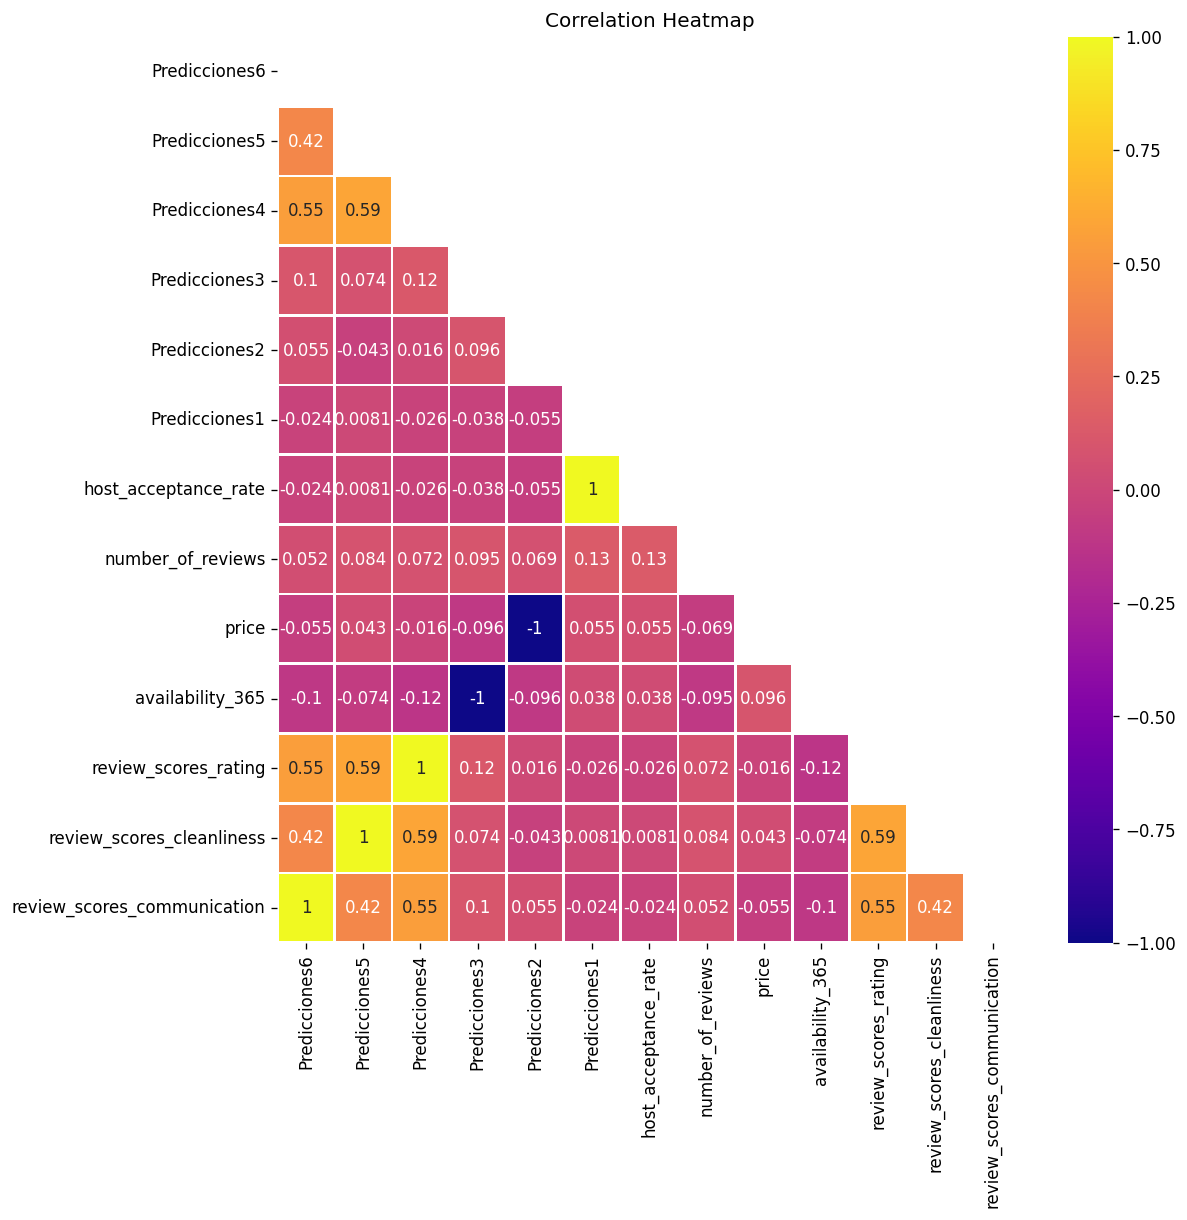

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

## **HOTEL ROOM**

In [ ]:
df_clean=df2[df2['room_type']=='Hotel room']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 22 to 12884
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         172 non-null    float64
 1   number_of_reviews            172 non-null    int64  
 2   price                        172 non-null    float64
 3   availability_365             172 non-null    int64  
 4   review_scores_rating         172 non-null    float64
 5   review_scores_cleanliness    172 non-null    float64
 6   review_scores_communication  172 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 10.8 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.450
number_of_reviews               116.500
price                          8134.500
availability_365               1043.500
review_scores_rating              6.740
review_scores_cleanliness         6.440
review_scores_communication       6.305
dtype: float64
Limite inferior permitido host_acceptance_rate              0.450
number_of_reviews               -93.500
price                         -5275.500
availability_365               -481.500
review_scores_rating              2.840
review_scores_cleanliness         3.240
review_scores_communication       3.405
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews   price  availability_365  \
22                     0.88               31.0  1098.0               348   
24                      NaN                9.0   600.0               364   
26                     0.88               44.0   998.0               345   
31                     0.88               19.0   998.0               327   
45                     0.79                7.0  2860.0               347   
...                     ...                ...     ...               ...   
10795                  1.00                0.0     0.0                 0   
10797                  0.90                0.0     0.0                 0   
10799                  1.00                0.0     0.0                 0   
10801                  0.90                0.0     0.0                 0   
12884                  1.00                0.0  1680.0               358   

       review_scores_rating  review_scores_cleanliness  \
22                     4.97                       4.94   
24                     4.89                       5.00   
26                     4.98                       4.91   
31                     4.95                       4.95   
45                     4.71                       5.00   
...                     ...                        ...   
10795                  4.70                       4.70   
10797                  4.70                       4.70   
10799                  4.70                       4.70   
10801                  4.70                       4.70   
12884                  4.70                       4.70   

       review_scores_communication  
22                             5.0  
24                             5.0  
26                             5.0  
31                             5.0  
45                             5.0  
...                            ...  
10795                          4.8  
10797                          4.8  
10799                          4.8  
10801                          4.8  
12884                          4.8  

[172 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

25

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews   price  availability_365  \
22                     0.88               31.0  1098.0               348   
24                     0.90                9.0   600.0               364   
26                     0.88               44.0   998.0               345   
31                     0.88               19.0   998.0               327   
45                     0.79                7.0  2860.0               347   
...                     ...                ...     ...               ...   
10795                  1.00                0.0     0.0                 0   
10797                  0.90                0.0     0.0                 0   
10799                  1.00                0.0     0.0                 0   
10801                  0.90                0.0     0.0                 0   
12884                  1.00                0.0  1680.0               358   

       review_scores_rating  review_scores_cleanliness  \
22                     4.97                       4.94   
24                     4.89                       5.00   
26                     4.98                       4.91   
31                     4.95                       4.95   
45                     4.71                       5.00   
...                     ...                        ...   
10795                  4.70                       4.70   
10797                  4.70                       4.70   
10799                  4.70                       4.70   
10801                  4.70                       4.70   
12884                  4.70                       4.70   

       review_scores_communication  
22                             5.0  
24                             5.0  
26                             5.0  
31                             5.0  
45                             5.0  
...                            ...  
10795                          4.8  
10797                          4.8  
10799                          4.8  
10801                          4.8  
12884                          4.8  

[172 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 22 to 12884
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         172 non-null    float64
 1   number_of_reviews            172 non-null    float64
 2   price                        172 non-null    float64
 3   availability_365             172 non-null    int64  
 4   review_scores_rating         172 non-null    float64
 5   review_scores_cleanliness    172 non-null    float64
 6   review_scores_communication  172 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.8 KB


### **Regresión Lineal**



Text(0, 0.5, 'number_of_reviews')

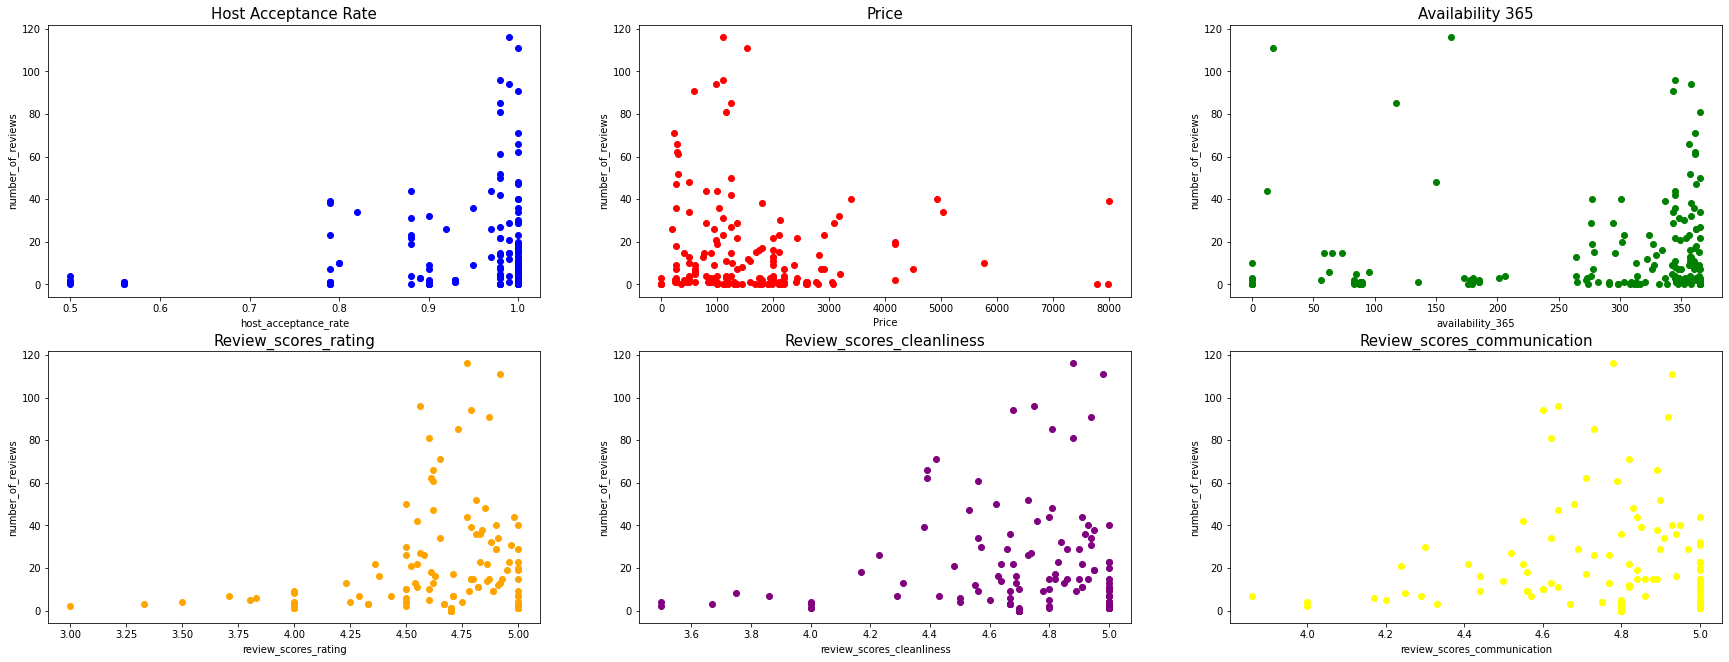

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)
ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=df_clean)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'number_of_reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=df_clean)
ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=df_clean)
ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)
ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)
ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate']]
Vars_Indep2= df[['price']]
Vars_Indep3= df[['availability_365']]
Vars_Indep4= df[['review_scores_rating']]
Vars_Indep5= df[['review_scores_cleanliness']]
Vars_Indep6= df[['review_scores_communication']]

Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model2= LinearRegression()
model3= LinearRegression()
model4= LinearRegression()
model5= LinearRegression()
model6= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep)
model3.fit(X=Vars_Indep3, y=Var_Dep)
model4.fit(X=Vars_Indep4, y=Var_Dep)
model5.fit(X=Vars_Indep5, y=Var_Dep)
model6.fit(X=Vars_Indep6, y=Var_Dep)

LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))
print('Modelo 2: ',model2.score(Vars_Indep2,Var_Dep))
print('Modelo 3: ',model3.score(Vars_Indep3,Var_Dep))
print('Modelo 4: ',model4.score(Vars_Indep4,Var_Dep))
print('Modelo 5: ',model5.score(Vars_Indep5,Var_Dep))
print('Modelo 6: ',model6.score(Vars_Indep6,Var_Dep))

Modelo 1:  0.02670333510309364
Modelo 2:  0.005568221093487646
Modelo 3:  0.00962094385769563
Modelo 4:  0.007296842474677989
Modelo 5:  6.666077774242218e-05
Modelo 6:  0.0068660060367286


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate']])
y_pred2= model2.predict(X=df[['price']])
y_pred3= model3.predict(X=df[['availability_365']])
y_pred4= model4.predict(X=df[['review_scores_rating']])
y_pred5= model5.predict(X=df[['review_scores_cleanliness']])
y_pred6= model6.predict(X=df[['review_scores_communication']])



In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)
df.insert(0, 'Predicciones2', y_pred2)
df.insert(0, 'Predicciones3', y_pred3)
df.insert(0, 'Predicciones4', y_pred4)
df.insert(0, 'Predicciones5', y_pred5)
df.insert(0, 'Predicciones6', y_pred6)

df

Predicciones6  Predicciones5  Predicciones4  Predicciones3  \
22         13.276562      14.814788      16.532469      16.333712   
24         13.276562      14.776729      16.086427      16.650943   
26         13.276562      14.833817      16.588224      16.274231   
31         13.276562      14.808445      16.420959      15.917345   
45         13.276562      14.776729      15.082834      16.313885   
...              ...            ...            ...            ...   
10795      15.006121      14.967022      15.027078       9.433931   
10797      15.006121      14.967022      15.027078       9.433931   
10799      15.006121      14.967022      15.027078       9.433931   
10801      15.006121      14.967022      15.027078       9.433931   
12884      15.006121      14.967022      15.027078      16.531981   

       Predicciones2  Predicciones1  host_acceptance_rate  number_of_reviews  \
22         15.553362      13.019016                  0.88               31.0   
24         16.179865      13.667941                  0.90                9.0   
26         15.679166      13.019016                  0.88               44.0   
31         15.679166      13.019016                  0.88               19.0   
45         13.336702      10.098855                  0.79                7.0   
...              ...            ...                   ...                ...   
10795      16.934686      16.912564                  1.00                0.0   
10797      16.934686      13.667941                  0.90                0.0   
10799      16.934686      16.912564                  1.00                0.0   
10801      16.934686      13.667941                  0.90                0.0   
12884      14.821185      16.912564                  1.00                0.0   

        price  availability_365  review_scores_rating  \
22     1098.0               348                  4.97   
24      600.0               364                  4.89   
26      998.0               345                  4.98   
31      998.0               327                  4.95   
45     2860.0               347                  4.71   
...       ...               ...                   ...   
10795     0.0                 0                  4.70   
10797     0.0                 0                  4.70   
10799     0.0                 0                  4.70   
10801     0.0                 0                  4.70   
12884  1680.0               358                  4.70   

       review_scores_cleanliness  review_scores_communication  
22                          4.94                          5.0  
24                          5.00                          5.0  
26                          4.91                          5.0  
31                          4.95                          5.0  
45                          5.00                          5.0  
...                          ...                          ...  
10795                       4.70                          4.8  
10797                       4.70                          4.8  
10799                       4.70                          4.8  
10801                       4.70                          4.8  
12884                       4.70                          4.8  

[172 rows x 13 columns]

Text(0, 0.5, 'number_of_reviews')

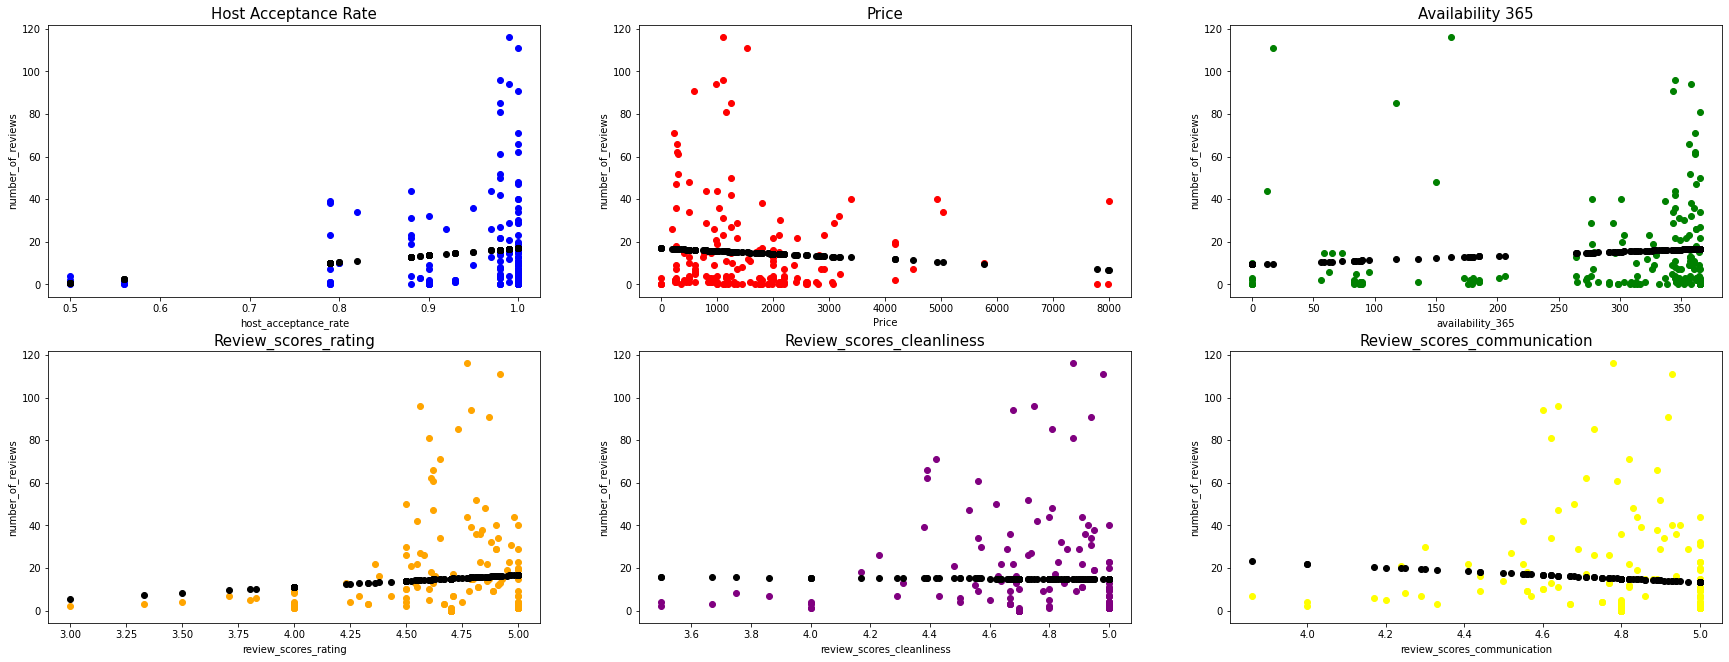

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=df)
ax2.scatter(x='price', y='Predicciones2', color="black", data=df)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'number_of_reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=df)
ax3.scatter(x='availability_365', y='Predicciones3', color="black", data=df)

ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=df)
ax4.scatter(x='review_scores_rating', y='Predicciones4', color="black", data=df)

ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df)
ax5.scatter(x='review_scores_cleanliness', y='Predicciones5', color="black", data=df)

ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df)
ax6.scatter(x='review_scores_communication', y='Predicciones6', color="black", data=df)

ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep)
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep)
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep)
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep)
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep)
print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)
print('Modelo 2: ',coef_Deter2)
print('Modelo 3: ',coef_Deter3)
print('Modelo 4: ',coef_Deter4)
print('Modelo 5: ',coef_Deter5)
print('Modelo 6: ',coef_Deter6)

Coeficientes de determinación
Modelo 1:  0.02670333510309364
Modelo 2:  0.005568221093487646
Modelo 3:  0.00962094385769563
Modelo 4:  0.007296842474677989
Modelo 5:  6.666077774242218e-05
Modelo 6:  0.0068660060367286


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl6=np.sqrt(coef_Deter6)
print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)
print('Modelo 2: ',coef_Correl2)
print('Modelo 3: ',coef_Correl3)
print('Modelo 4: ',coef_Correl4)
print('Modelo 5: ',coef_Correl5)
print('Modelo 6: ',coef_Correl6)

Coeficientes de correlación
Modelo 1:  0.16341155131475144
Modelo 2:  0.07462051389187592
Modelo 3:  0.09808641015806231
Modelo 4:  0.08542155743533356
Modelo 5:  0.008164605179824813
Modelo 6:  0.08286136637015226


Text(0.5, 1.0, 'Correlation Heatmap')

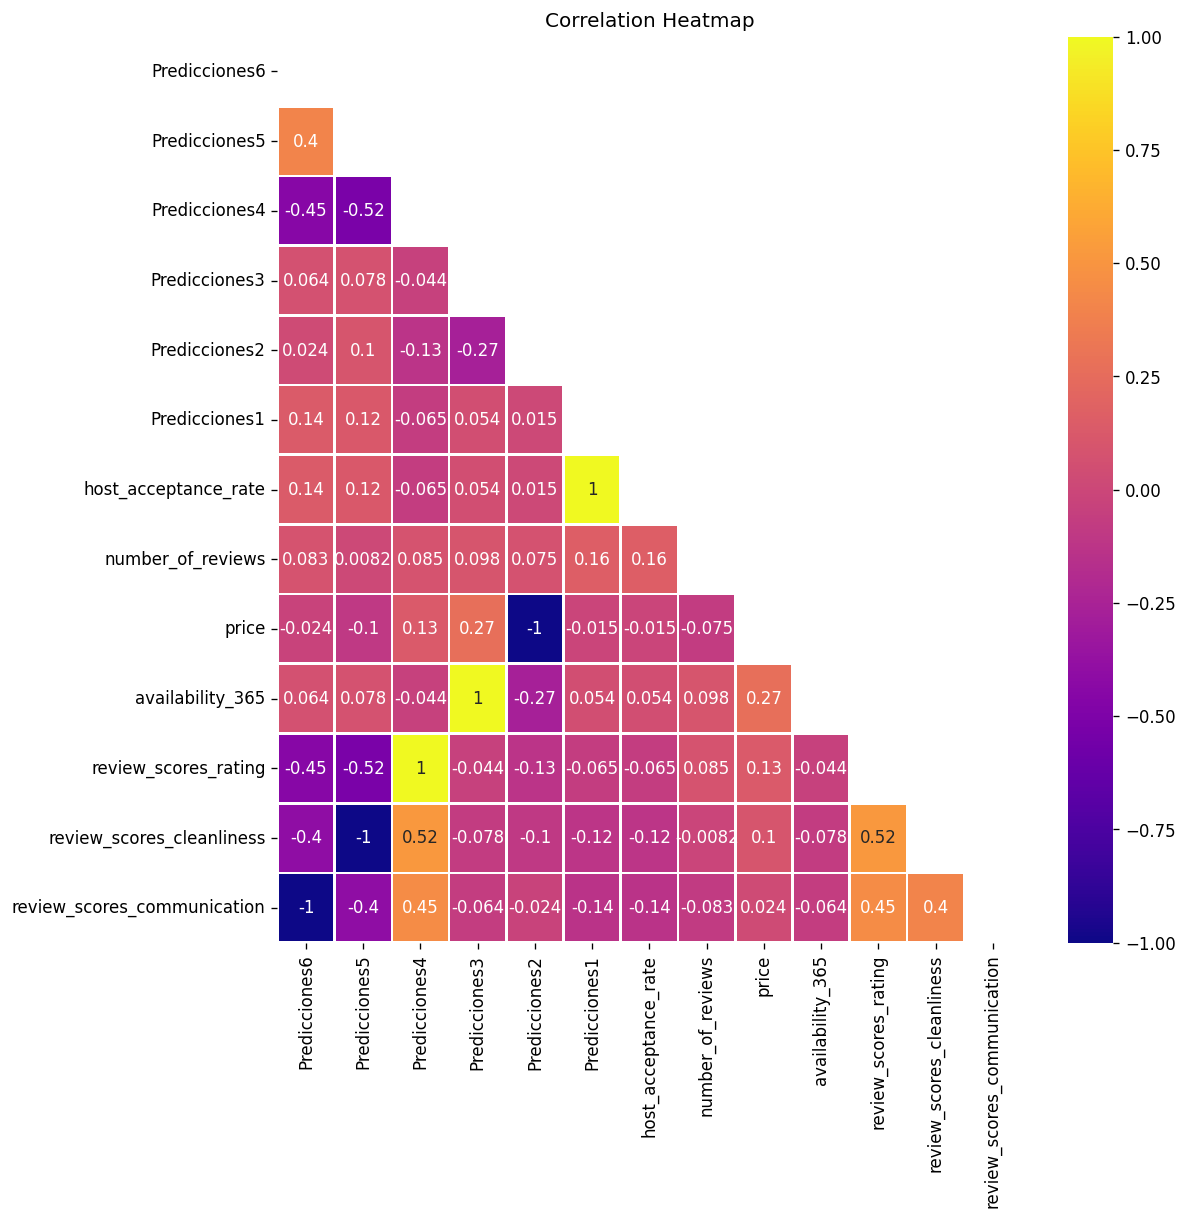

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

# **ANALISIS DE REGRESIÓN LINEAL MULTIPLE**
Barcelona

## **LIBRERÍAS**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **EXPLORACIÓN Y LIMPIEZA**

In [ ]:
df= pd.read_csv("barcelona.csv",encoding="ISO-8859-1")
#df['host_acceptance_rate '] = pd.to_numeric(df['host_acceptance_rate'])
#df = df.select_dtypes(include = ["number"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16920 non-null  float64
 1   listing_url                                   16920 non-null  object 
 2   scrape_id                                     16920 non-null  float64
 3   last_scraped                                  16920 non-null  object 
 4   source                                        16920 non-null  object 
 5   name                                          16910 non-null  object 
 6   description                                   16834 non-null  object 
 7   neighborhood_overview                         9927 non-null   object 
 8   picture_url                                   16920 non-null  object 
 9   host_id                                       16920 non-null 

In [ ]:
df['room_type'].unique()


array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
df2=df.copy()
df2=df2.fillna(round(df.mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
valores_nulos=df2.isnull().sum().sum()
valores_nulos


80193

AxesSubplot(0.125,0.125;0.775x0.755)


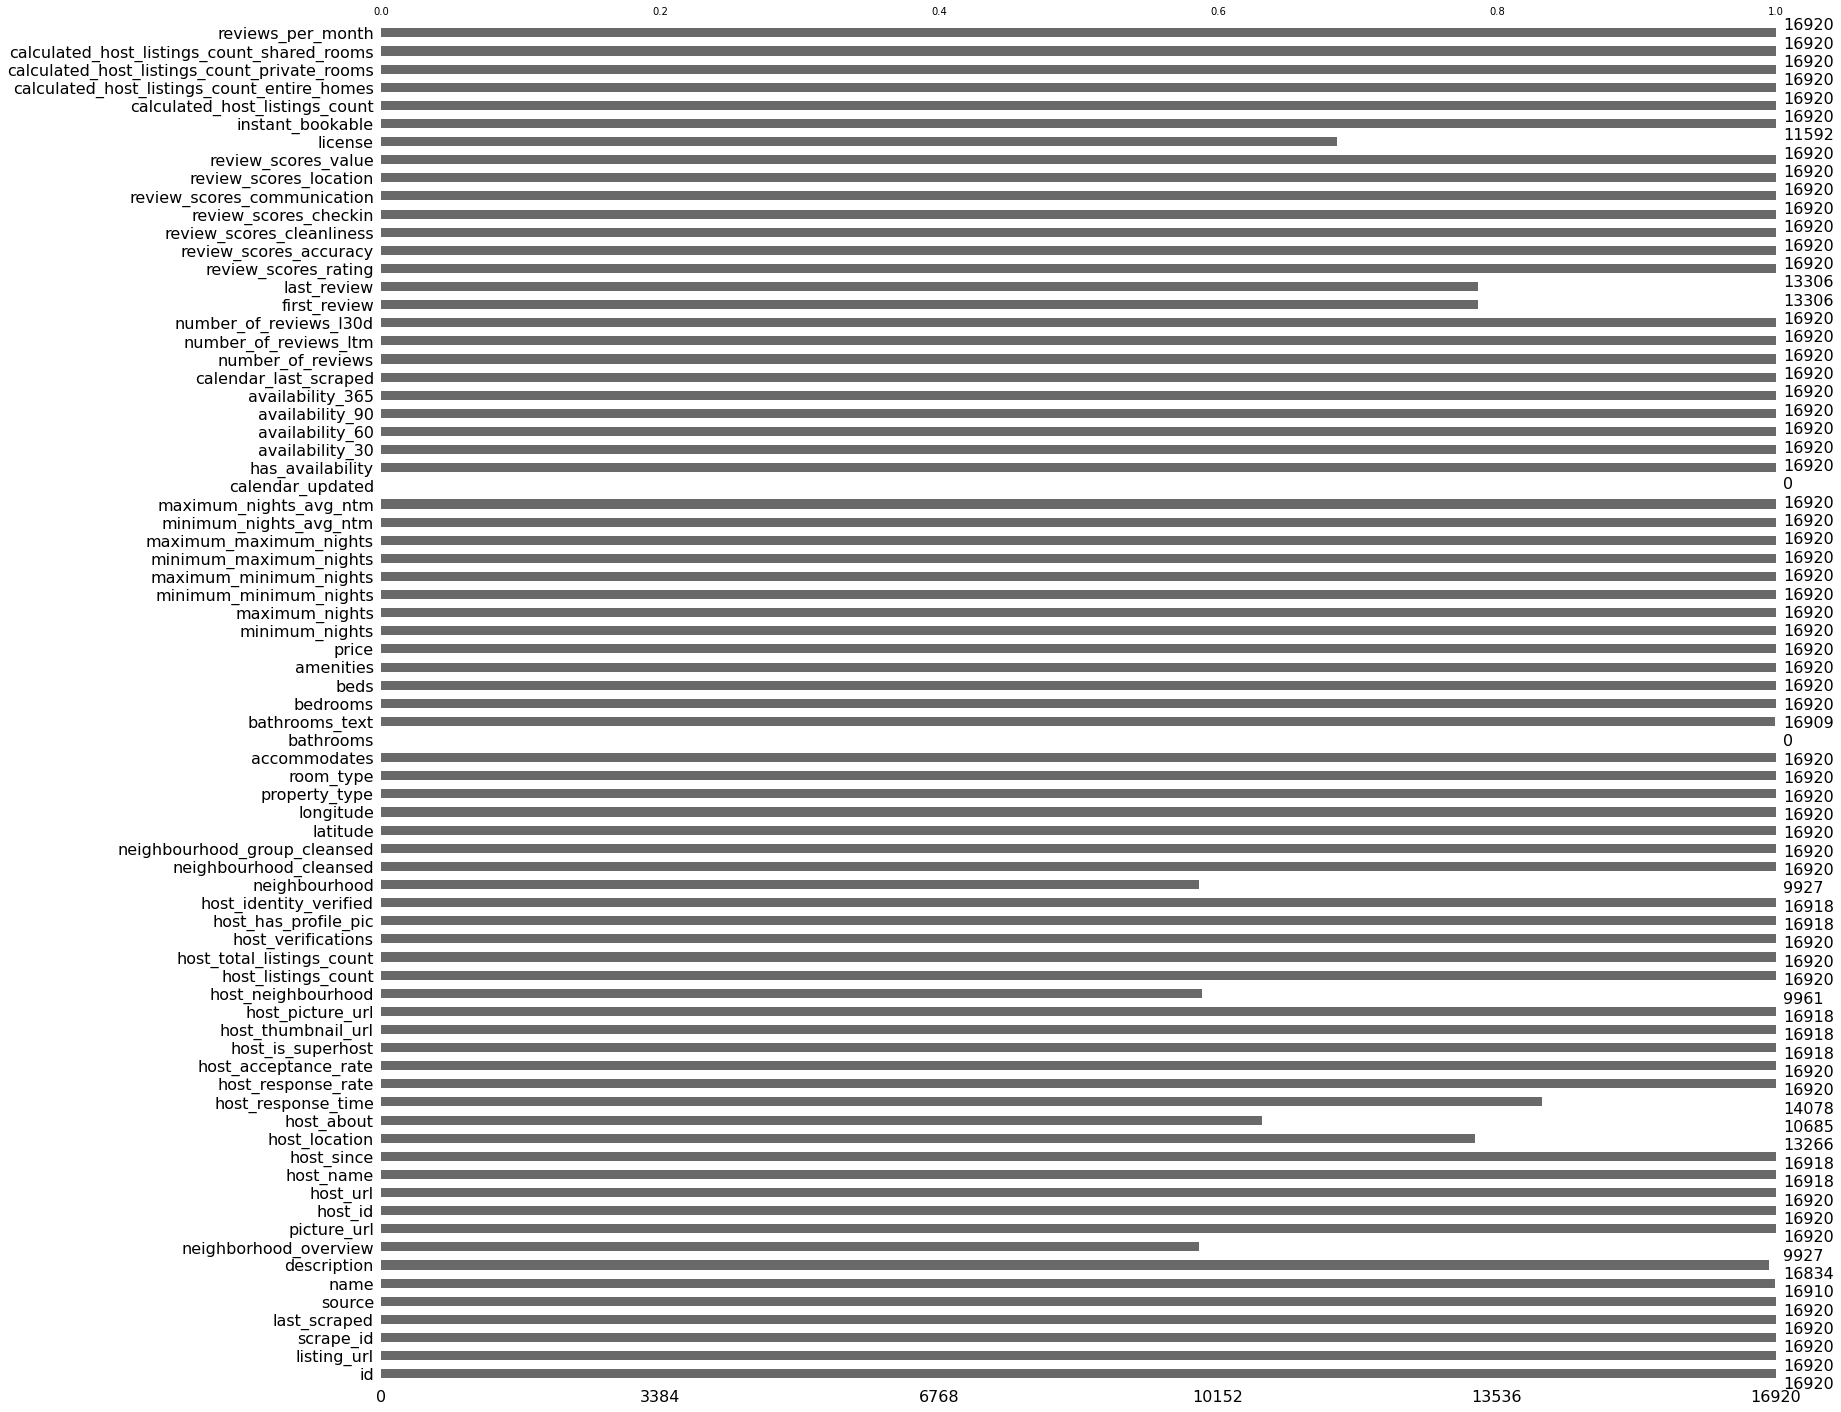

In [ ]:
print(msno.bar(df2))

## **ENTIRE HOME APT**

In [ ]:
df_clean=df2[df2['room_type']=='Entire home/apt']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10046 entries, 1 to 16918
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         10046 non-null  float64
 1   number_of_reviews            10046 non-null  int64  
 2   price                        10046 non-null  float64
 3   availability_365             10046 non-null  int64  
 4   review_scores_rating         10046 non-null  float64
 5   review_scores_cleanliness    10046 non-null  float64
 6   review_scores_communication  10046 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 627.9 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.450
number_of_reviews               331.000
price                           845.500
availability_365               1370.500
review_scores_rating              6.430
review_scores_cleanliness         6.380
review_scores_communication       6.165
dtype: float64
Limite inferior permitido host_acceptance_rate             0.450
number_of_reviews             -269.000
price                         -524.500
availability_365              -979.500
review_scores_rating             2.830
review_scores_cleanliness        2.980
review_scores_communication      3.465
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews  price  availability_365  \
1                      1.00               54.0  110.0               151   
2                      0.97              145.0   86.0               218   
3                      0.93               30.0  180.0                60   
4                      1.00               10.0  110.0               106   
5                      0.84                0.0   71.0               269   
...                     ...                ...    ...               ...   
16911                  0.99               19.0  231.0               110   
16912                  0.99                0.0  208.0                 0   
16913                  0.99                0.0  175.0                44   
16914                  1.00                1.0   50.0                 0   
16918                   NaN               12.0  250.0                 0   

       review_scores_rating  review_scores_cleanliness  \
1                      4.83                       4.70   
2                      4.94                       4.94   
3                      4.38                       4.72   
4                      4.70                       4.90   
5                      4.50                       4.60   
...                     ...                        ...   
16911                  4.16                       4.37   
16912                  4.50                       4.60   
16913                  4.50                       4.60   
16914                   NaN                        NaN   
16918                  4.82                       4.82   

       review_scores_communication  
1                             4.98  
2                             4.99  
3                             4.79  
4                             4.50  
5                             4.70  
...                            ...  
16911                         4.32  
16912                         4.70  
16913                         4.70  
16914                          NaN  
16918                         5.00  

[10046 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

1321

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews  price  availability_365  \
1                      1.00               54.0  110.0               151   
2                      0.97              145.0   86.0               218   
3                      0.93               30.0  180.0                60   
4                      1.00               10.0  110.0               106   
5                      0.84                0.0   71.0               269   
...                     ...                ...    ...               ...   
16911                  0.99               19.0  231.0               110   
16912                  0.99                0.0  208.0                 0   
16913                  0.99                0.0  175.0                44   
16914                  1.00                1.0   50.0                 0   
16918                  0.90               12.0  250.0                 0   

       review_scores_rating  review_scores_cleanliness  \
1                      4.83                       4.70   
2                      4.94                       4.94   
3                      4.38                       4.72   
4                      4.70                       4.90   
5                      4.50                       4.60   
...                     ...                        ...   
16911                  4.16                       4.37   
16912                  4.50                       4.60   
16913                  4.50                       4.60   
16914                  4.60                       4.60   
16918                  4.82                       4.82   

       review_scores_communication  
1                             4.98  
2                             4.99  
3                             4.79  
4                             4.50  
5                             4.70  
...                            ...  
16911                         4.32  
16912                         4.70  
16913                         4.70  
16914                         4.70  
16918                         5.00  

[10046 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10046 entries, 1 to 16918
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         10046 non-null  float64
 1   number_of_reviews            10046 non-null  float64
 2   price                        10046 non-null  float64
 3   availability_365             10046 non-null  int64  
 4   review_scores_rating         10046 non-null  float64
 5   review_scores_cleanliness    10046 non-null  float64
 6   review_scores_communication  10046 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 627.9 KB


### **Regresión Lineal**



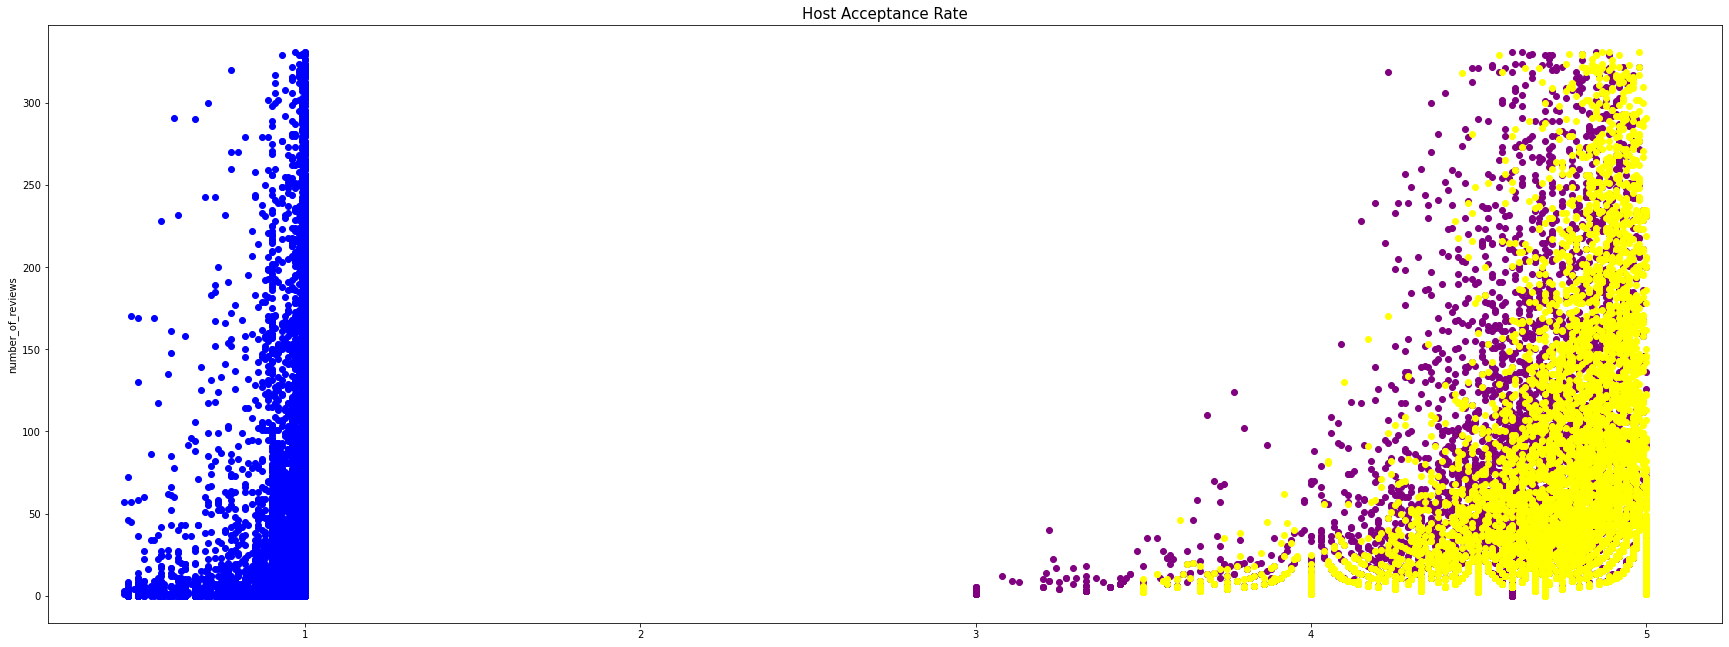

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)

ax1.set_ylabel(r'number_of_reviews')

ax1.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)

ax1.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']]


Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()


In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)


LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))


Modelo 1:  0.06662965622047046


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']])




In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)


df

Predicciones1  host_acceptance_rate  number_of_reviews  price  \
1          59.047860                  1.00               54.0  110.0   
2          60.384202                  0.97              145.0   86.0   
3          45.824047                  0.93               30.0  180.0   
4          49.476028                  1.00               10.0  110.0   
5          30.333534                  0.84                0.0   71.0   
...              ...                   ...                ...    ...   
16911      33.072570                  0.99               19.0  231.0   
16912      48.114378                  0.99                0.0  208.0   
16913      48.114378                  0.99                0.0  175.0   
16914      49.299768                  1.00                1.0   50.0   
16918      50.059469                  0.90               12.0  250.0   

       availability_365  review_scores_rating  review_scores_cleanliness  \
1                   151                  4.83                       4.70   
2                   218                  4.94                       4.94   
3                    60                  4.38                       4.72   
4                   106                  4.70                       4.90   
5                   269                  4.50                       4.60   
...                 ...                   ...                        ...   
16911               110                  4.16                       4.37   
16912                 0                  4.50                       4.60   
16913                44                  4.50                       4.60   
16914                 0                  4.60                       4.60   
16918                 0                  4.82                       4.82   

       review_scores_communication  
1                             4.98  
2                             4.99  
3                             4.79  
4                             4.50  
5                             4.70  
...                            ...  
16911                         4.32  
16912                         4.70  
16913                         4.70  
16914                         4.70  
16918                         5.00  

[10046 rows x 8 columns]

Text(0, 0.5, 'number_of_reviews')

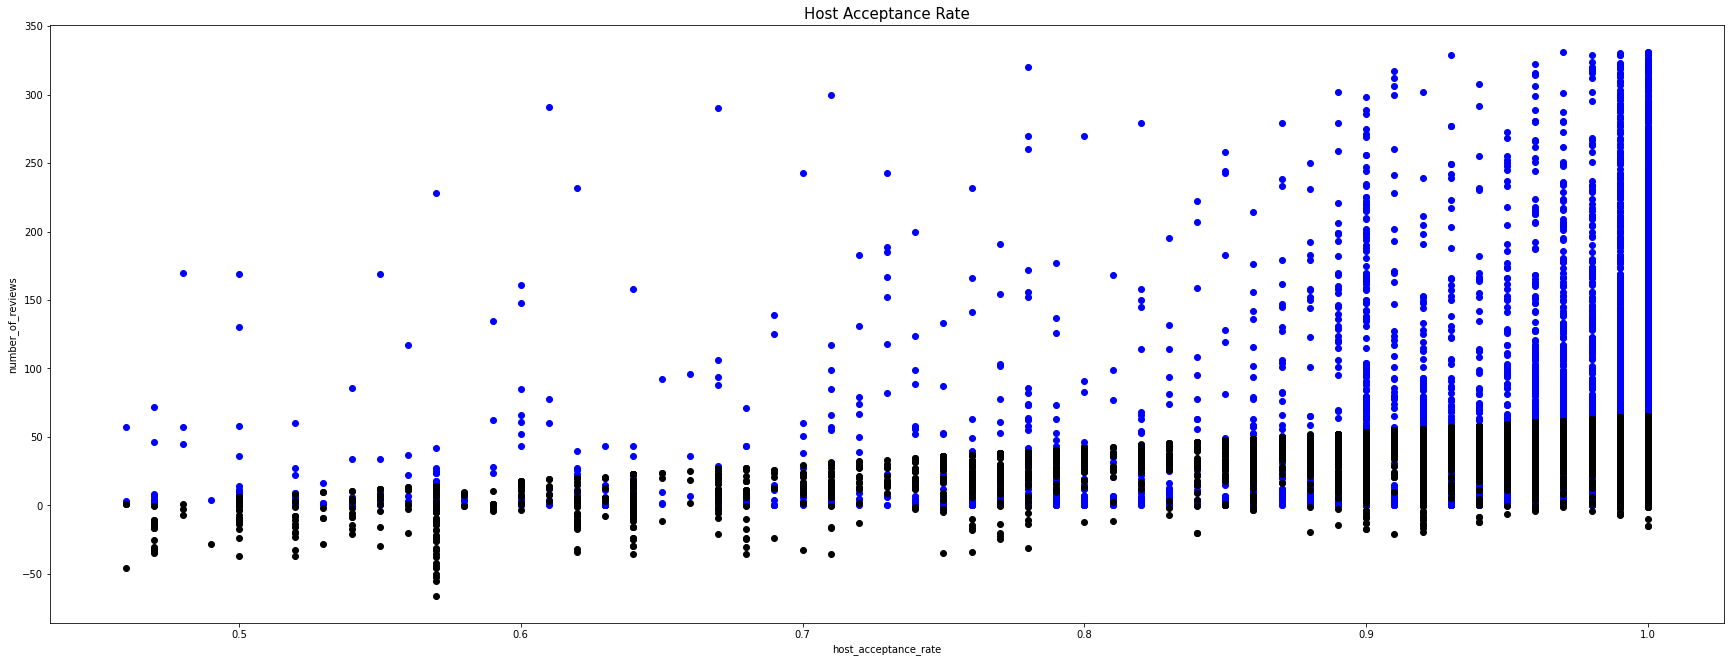

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)

print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)


Coeficientes de determinación
Modelo 1:  0.06662965622047046


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)

print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)


Coeficientes de correlación
Modelo 1:  0.2581272093764438


Text(0.5, 1.0, 'Correlation Heatmap')

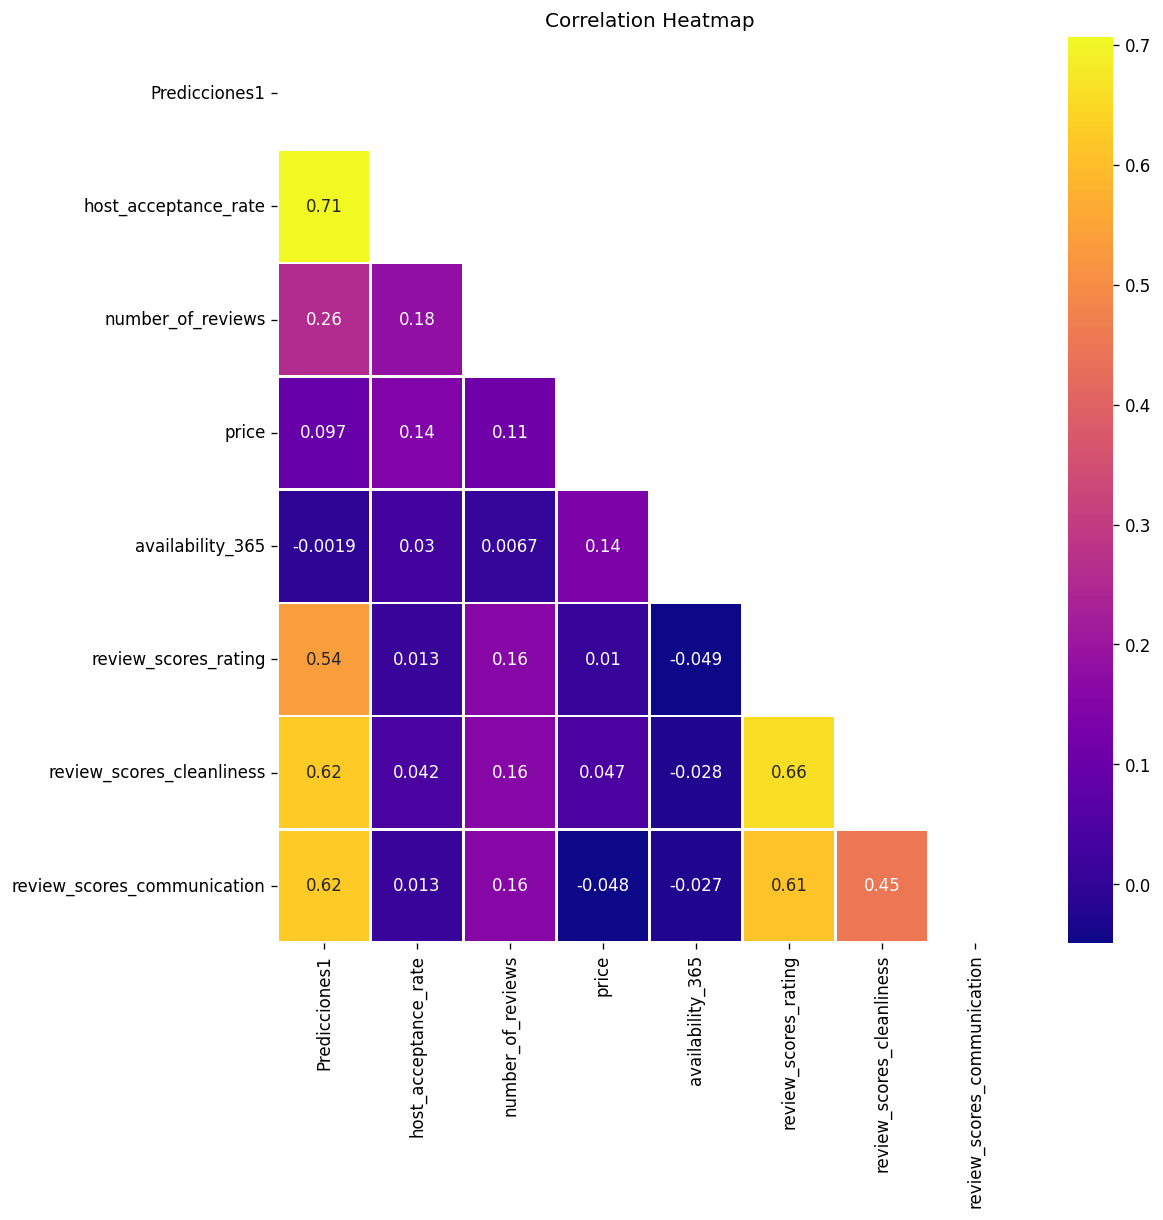

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')





## **PRIVATE ROOM**

In [ ]:
df_clean=df2[df2['room_type']=='Private room']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6526 entries, 0 to 16919
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         6526 non-null   float64
 1   number_of_reviews            6526 non-null   int64  
 2   price                        6526 non-null   float64
 3   availability_365             6526 non-null   int64  
 4   review_scores_rating         6526 non-null   float64
 5   review_scores_cleanliness    6526 non-null   float64
 6   review_scores_communication  6526 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 407.9 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.450
number_of_reviews               137.500
price                           312.500
availability_365               1556.500
review_scores_rating              6.425
review_scores_cleanliness         6.195
review_scores_communication       6.350
dtype: float64
Limite inferior permitido host_acceptance_rate              0.450
number_of_reviews              -112.500
price                          -197.500
availability_365              -1273.500
review_scores_rating              2.925
review_scores_cleanliness         3.295
review_scores_communication       3.350
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews  price  availability_365  \
0                      1.00                9.0   59.0               351   
12                     0.61              101.0   39.0               231   
16                     0.90                0.0   36.0               340   
32                     0.99               58.0  100.0                 9   
33                     0.78               93.0  200.0               345   
...                     ...                ...    ...               ...   
16907                  1.00               25.0   34.0                 0   
16915                  0.48               30.0    NaN                 0   
16916                  0.48                2.0    NaN                 0   
16917                  0.48               13.0    NaN                 0   
16919                  0.80                5.0   33.0                 0   

       review_scores_rating  review_scores_cleanliness  \
0                      4.89                       5.00   
12                     4.78                       4.72   
16                     4.50                       4.60   
32                     4.97                       4.91   
33                     4.74                       4.30   
...                     ...                        ...   
16907                  4.96                       5.00   
16915                  4.13                       4.00   
16916                  3.50                       3.50   
16917                  4.31                       4.46   
16919                  4.60                       4.80   

       review_scores_communication  
0                             4.89  
12                            4.91  
16                            4.70  
32                            5.00  
33                            4.93  
...                            ...  
16907                         5.00  
16915                         4.67  
16916                         4.00  
16917                         4.31  
16919                         5.00  

[6526 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

1414

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews  price  availability_365  \
0                      1.00                9.0   59.0               351   
12                     0.61              101.0   39.0               231   
16                     0.90                0.0   36.0               340   
32                     0.99               58.0  100.0                 9   
33                     0.78               93.0  200.0               345   
...                     ...                ...    ...               ...   
16907                  1.00               25.0   34.0                 0   
16915                  0.48               30.0   64.9                 0   
16916                  0.48                2.0   64.9                 0   
16917                  0.48               13.0   64.9                 0   
16919                  0.80                5.0   33.0                 0   

       review_scores_rating  review_scores_cleanliness  \
0                      4.89                       5.00   
12                     4.78                       4.72   
16                     4.50                       4.60   
32                     4.97                       4.91   
33                     4.74                       4.30   
...                     ...                        ...   
16907                  4.96                       5.00   
16915                  4.13                       4.00   
16916                  3.50                       3.50   
16917                  4.31                       4.46   
16919                  4.60                       4.80   

       review_scores_communication  
0                             4.89  
12                            4.91  
16                            4.70  
32                            5.00  
33                            4.93  
...                            ...  
16907                         5.00  
16915                         4.67  
16916                         4.00  
16917                         4.31  
16919                         5.00  

[6526 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6526 entries, 0 to 16919
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         6526 non-null   float64
 1   number_of_reviews            6526 non-null   float64
 2   price                        6526 non-null   float64
 3   availability_365             6526 non-null   int64  
 4   review_scores_rating         6526 non-null   float64
 5   review_scores_cleanliness    6526 non-null   float64
 6   review_scores_communication  6526 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 407.9 KB


### **Regresión Lineal**



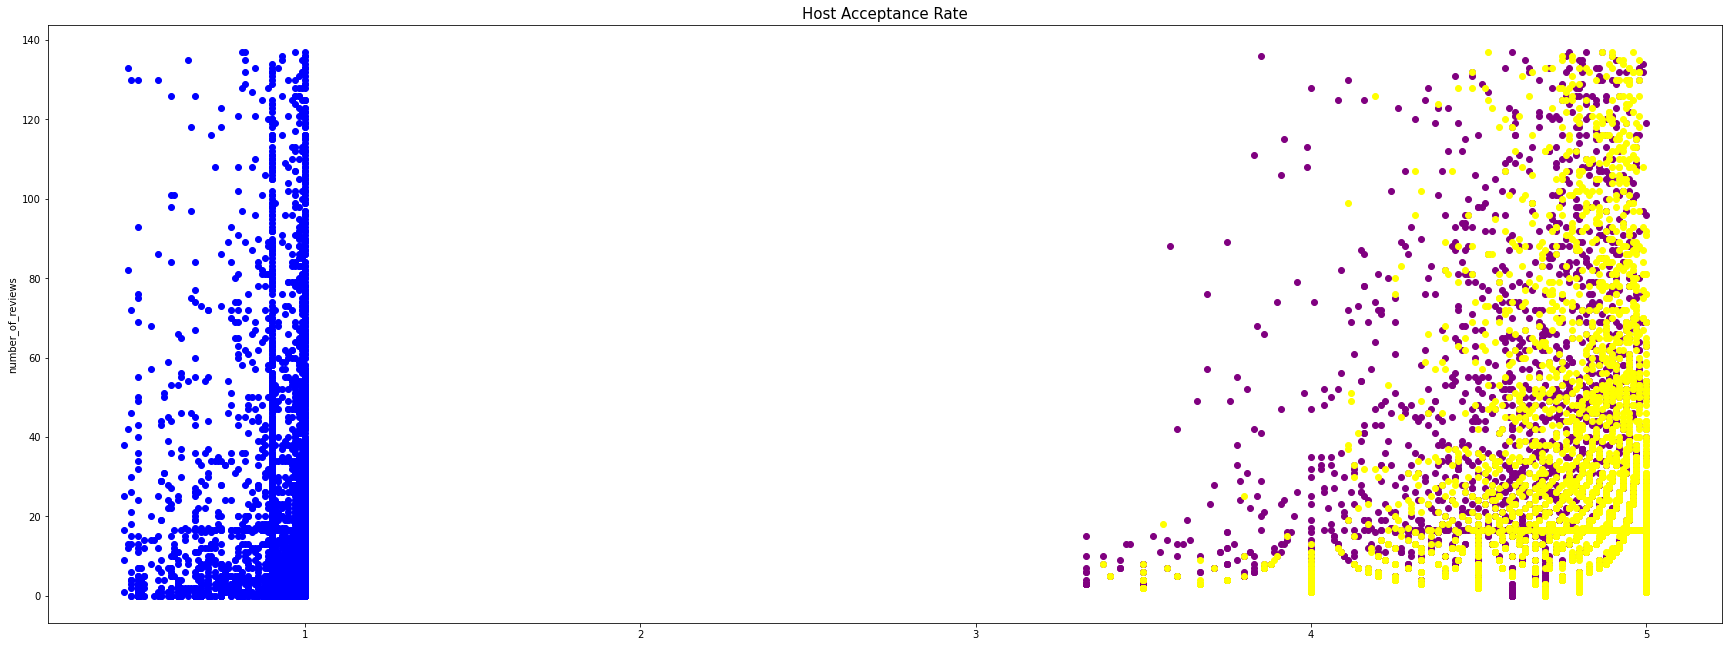

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)

ax1.set_ylabel(r'number_of_reviews')

ax1.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)

ax1.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']]


Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()


In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)


LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))


Modelo 1:  0.011553489584313237


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']])




In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)


df

Predicciones1  host_acceptance_rate  number_of_reviews  price  \
0          19.824393                  1.00                9.0   59.0   
12         13.138466                  0.61              101.0   39.0   
16         15.553258                  0.90                0.0   36.0   
32         20.339538                  0.99               58.0  100.0   
33         14.775019                  0.78               93.0  200.0   
...              ...                   ...                ...    ...   
16907      20.747331                  1.00               25.0   34.0   
16915       7.084341                  0.48               30.0   64.9   
16916       0.061855                  0.48                2.0   64.9   
16917       5.352696                  0.48               13.0   64.9   
16919      17.074539                  0.80                5.0   33.0   

       availability_365  review_scores_rating  review_scores_cleanliness  \
0                   351                  4.89                       5.00   
12                  231                  4.78                       4.72   
16                  340                  4.50                       4.60   
32                    9                  4.97                       4.91   
33                  345                  4.74                       4.30   
...                 ...                   ...                        ...   
16907                 0                  4.96                       5.00   
16915                 0                  4.13                       4.00   
16916                 0                  3.50                       3.50   
16917                 0                  4.31                       4.46   
16919                 0                  4.60                       4.80   

       review_scores_communication  
0                             4.89  
12                            4.91  
16                            4.70  
32                            5.00  
33                            4.93  
...                            ...  
16907                         5.00  
16915                         4.67  
16916                         4.00  
16917                         4.31  
16919                         5.00  

[6526 rows x 8 columns]

Text(0, 0.5, 'number_of_reviews')

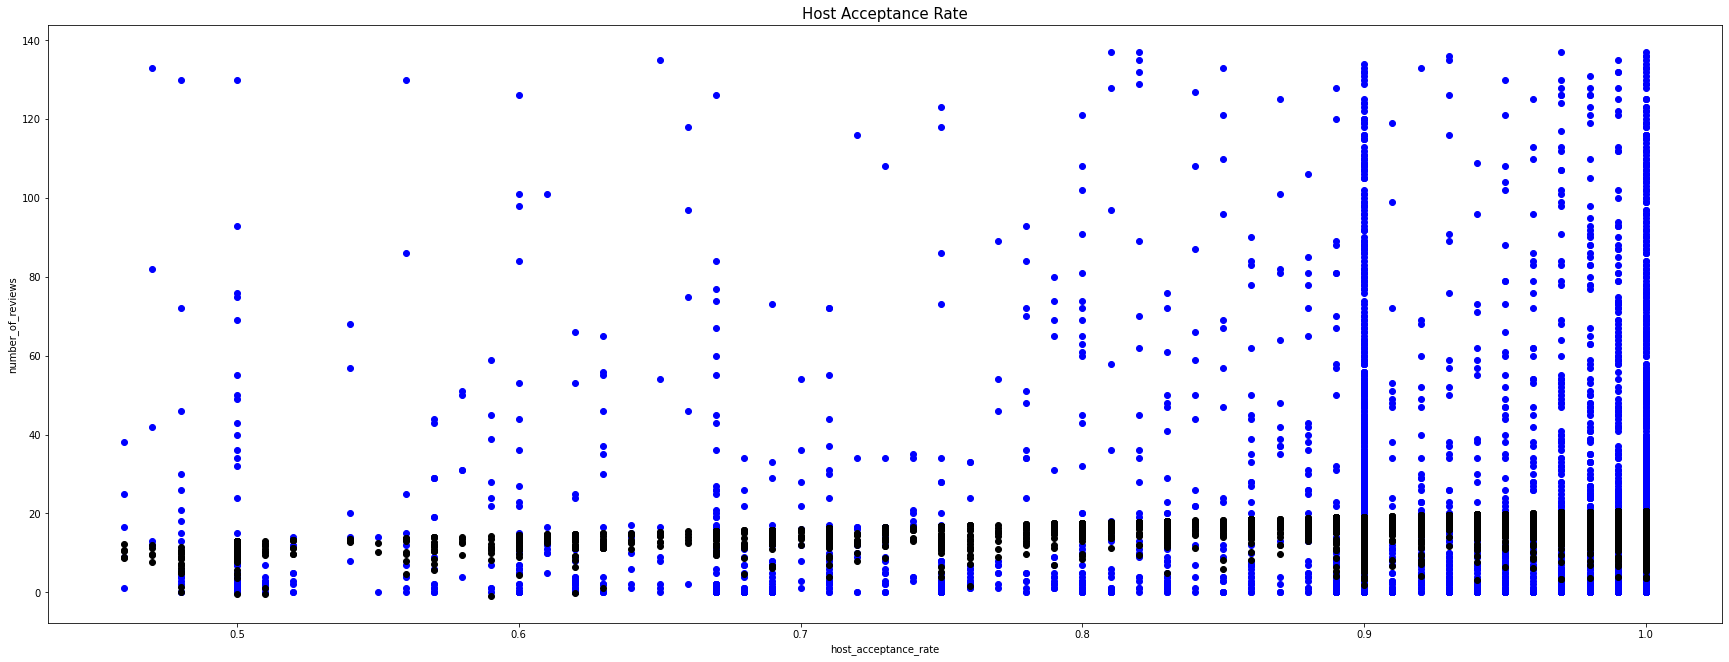

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)

print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)


Coeficientes de determinación
Modelo 1:  0.011553489584313237


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)

print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)


Coeficientes de correlación
Modelo 1:  0.10748716009046493


Text(0.5, 1.0, 'Correlation Heatmap')

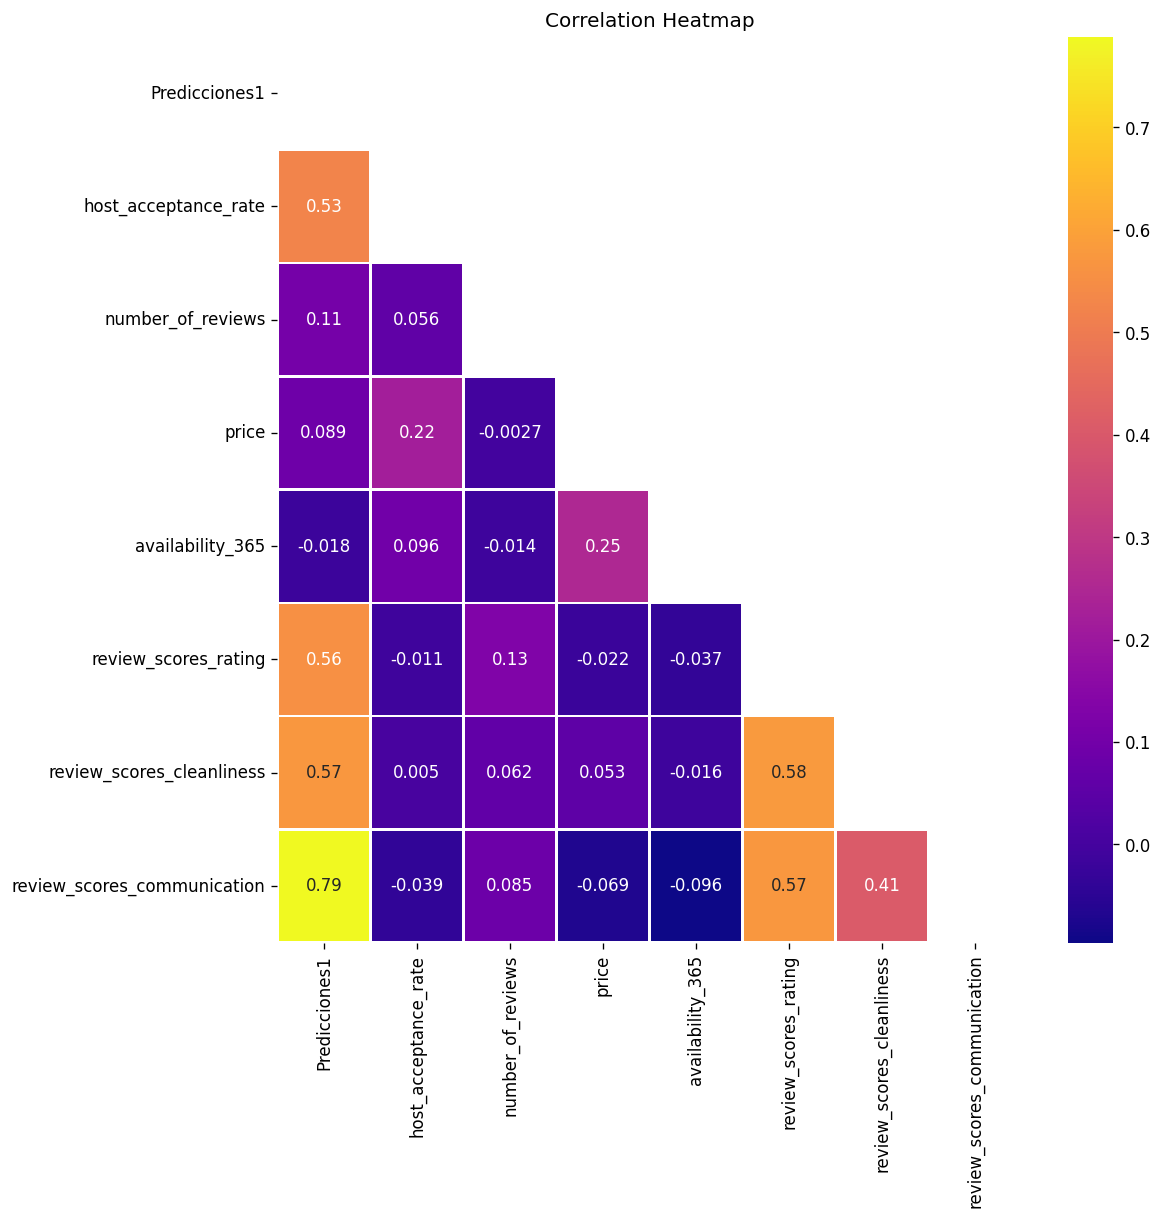

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')





## **HOTEL ROOM**

In [ ]:
df_clean=df2[df2['room_type']=='Hotel room']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 569 to 16862
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         172 non-null    float64
 1   number_of_reviews            172 non-null    int64  
 2   price                        172 non-null    float64
 3   availability_365             172 non-null    int64  
 4   review_scores_rating         172 non-null    float64
 5   review_scores_cleanliness    172 non-null    float64
 6   review_scores_communication  172 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 10.8 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.27000
number_of_reviews               216.87500
price                          1275.00000
availability_365               1351.75000
review_scores_rating              6.82375
review_scores_cleanliness         6.59375
review_scores_communication       6.35000
dtype: float64
Limite inferior permitido host_acceptance_rate             0.67000
number_of_reviews             -175.62500
price                         -785.00000
availability_365              -898.25000
review_scores_rating             2.59875
review_scores_cleanliness        2.96875
review_scores_communication      3.35000
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews  price  availability_365  \
569                    0.98               65.0  220.0                70   
627                    0.98               54.0  218.0                61   
1556                   0.98               23.0  325.0               278   
1623                   0.98              136.0  215.0                45   
1652                   0.98                NaN  127.0               331   
...                     ...                ...    ...               ...   
15830                  0.97               57.0  201.0               145   
15842                  1.00                NaN   39.0               344   
15856                  0.97               59.0  241.0               134   
15898                  1.00               38.0   91.0               284   
16862                  0.99               38.0   71.0               312   

       review_scores_rating  review_scores_cleanliness  \
569                    4.43                       4.53   
627                    4.81                       4.73   
1556                   4.74                       4.87   
1623                   4.78                       4.71   
1652                   4.36                       4.34   
...                     ...                        ...   
15830                  4.56                       4.84   
15842                  4.46                       4.65   
15856                  4.52                       4.90   
15898                  4.65                       4.87   
16862                  4.37                       4.45   

       review_scores_communication  
569                           4.84  
627                           4.92  
1556                          4.68  
1623                          4.85  
1652                          4.70  
...                            ...  
15830                         4.44  
15842                         4.64  
15856                         4.50  
15898                         4.79  
16862                         4.84  

[172 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

28

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews  price  availability_365  \
569                    0.98               65.0  220.0                70   
627                    0.98               54.0  218.0                61   
1556                   0.98               23.0  325.0               278   
1623                   0.98              136.0  215.0                45   
1652                   0.98               22.8  127.0               331   
...                     ...                ...    ...               ...   
15830                  0.97               57.0  201.0               145   
15842                  1.00               22.8   39.0               344   
15856                  0.97               59.0  241.0               134   
15898                  1.00               38.0   91.0               284   
16862                  0.99               38.0   71.0               312   

       review_scores_rating  review_scores_cleanliness  \
569                    4.43                       4.53   
627                    4.81                       4.73   
1556                   4.74                       4.87   
1623                   4.78                       4.71   
1652                   4.36                       4.34   
...                     ...                        ...   
15830                  4.56                       4.84   
15842                  4.46                       4.65   
15856                  4.52                       4.90   
15898                  4.65                       4.87   
16862                  4.37                       4.45   

       review_scores_communication  
569                           4.84  
627                           4.92  
1556                          4.68  
1623                          4.85  
1652                          4.70  
...                            ...  
15830                         4.44  
15842                         4.64  
15856                         4.50  
15898                         4.79  
16862                         4.84  

[172 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 569 to 16862
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         172 non-null    float64
 1   number_of_reviews            172 non-null    float64
 2   price                        172 non-null    float64
 3   availability_365             172 non-null    int64  
 4   review_scores_rating         172 non-null    float64
 5   review_scores_cleanliness    172 non-null    float64
 6   review_scores_communication  172 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.8 KB


### **Regresión Lineal**



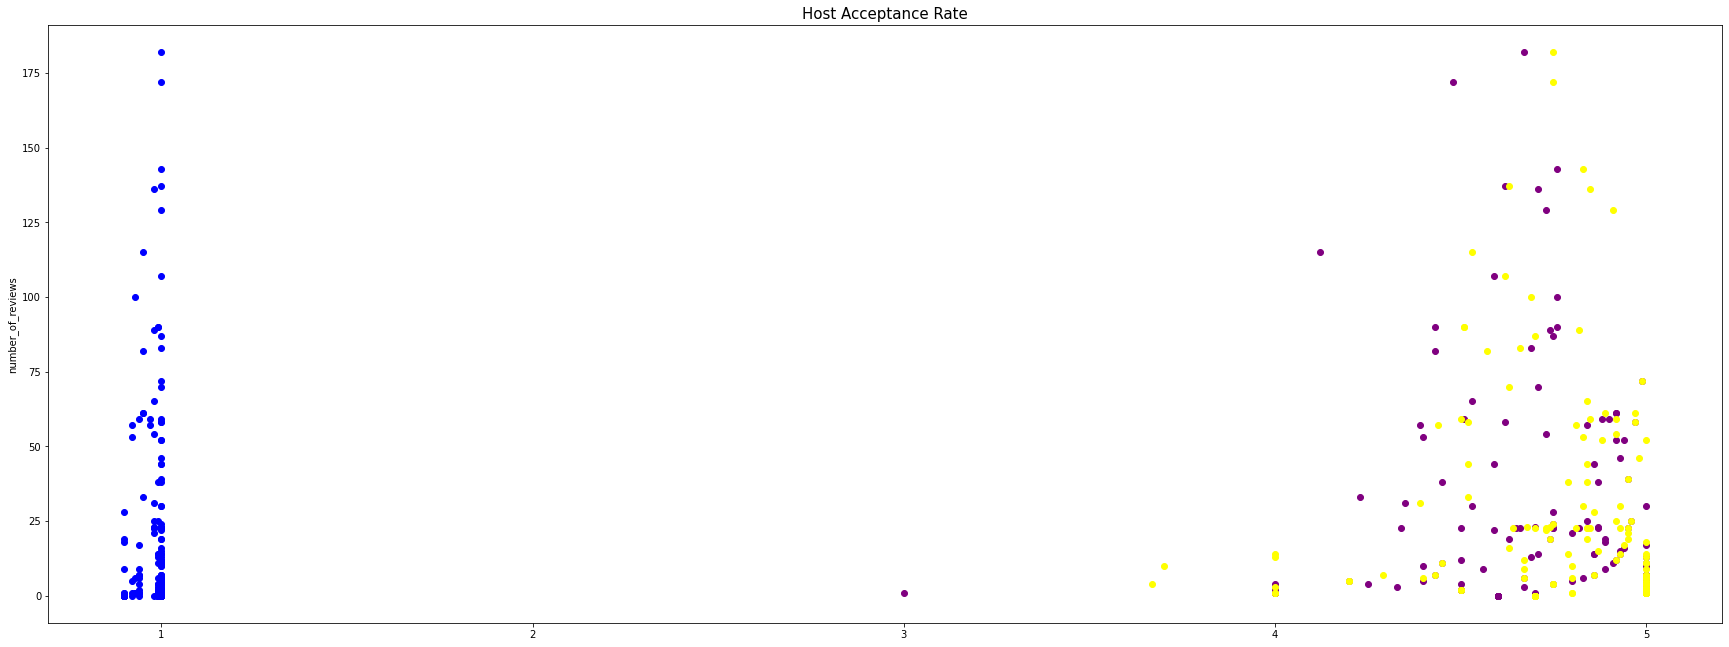

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)

ax1.set_ylabel(r'number_of_reviews')

ax1.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)

ax1.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']]


Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()


In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)


LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))


Modelo 1:  0.009040959486023348


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']])




In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)


df

Predicciones1  host_acceptance_rate  number_of_reviews  price  \
569        24.081452                  0.98               65.0  220.0   
627        23.054857                  0.98               54.0  218.0   
1556       21.812655                  0.98               23.0  325.0   
1623       23.047846                  0.98              136.0  215.0   
1652       24.943509                  0.98               22.8  127.0   
...              ...                   ...                ...    ...   
15830      20.633706                  0.97               57.0  201.0   
15842      24.886084                  1.00               22.8   39.0   
15856      20.389407                  0.97               59.0  241.0   
15898      23.866500                  1.00               38.0   91.0   
16862      25.478329                  0.99               38.0   71.0   

       availability_365  review_scores_rating  review_scores_cleanliness  \
569                  70                  4.43                       4.53   
627                  61                  4.81                       4.73   
1556                278                  4.74                       4.87   
1623                 45                  4.78                       4.71   
1652                331                  4.36                       4.34   
...                 ...                   ...                        ...   
15830               145                  4.56                       4.84   
15842               344                  4.46                       4.65   
15856               134                  4.52                       4.90   
15898               284                  4.65                       4.87   
16862               312                  4.37                       4.45   

       review_scores_communication  
569                           4.84  
627                           4.92  
1556                          4.68  
1623                          4.85  
1652                          4.70  
...                            ...  
15830                         4.44  
15842                         4.64  
15856                         4.50  
15898                         4.79  
16862                         4.84  

[172 rows x 8 columns]

Text(0, 0.5, 'number_of_reviews')

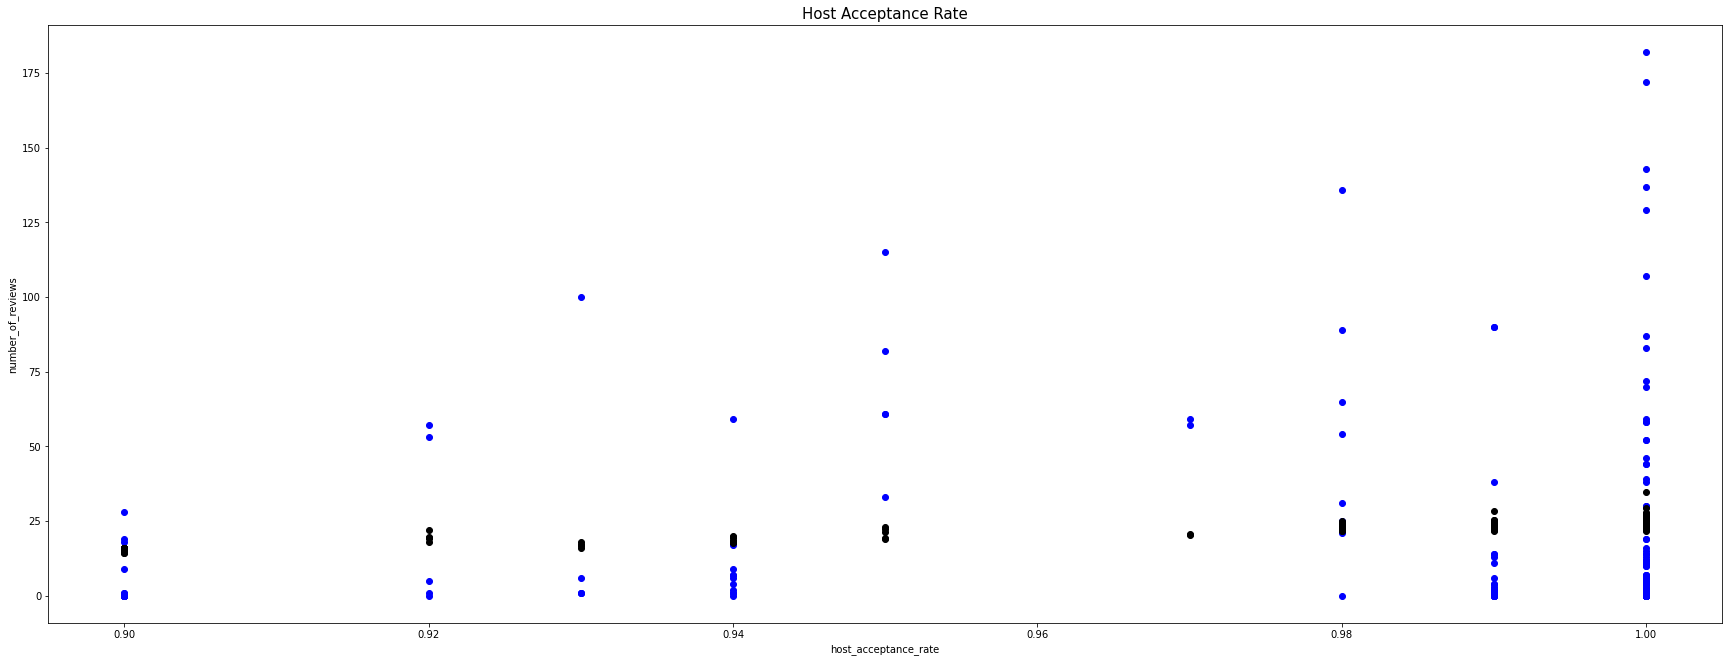

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)

print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)


Coeficientes de determinación
Modelo 1:  0.009040959486023348


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)

print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)


Coeficientes de correlación
Modelo 1:  0.09508396019320686


Text(0.5, 1.0, 'Correlation Heatmap')

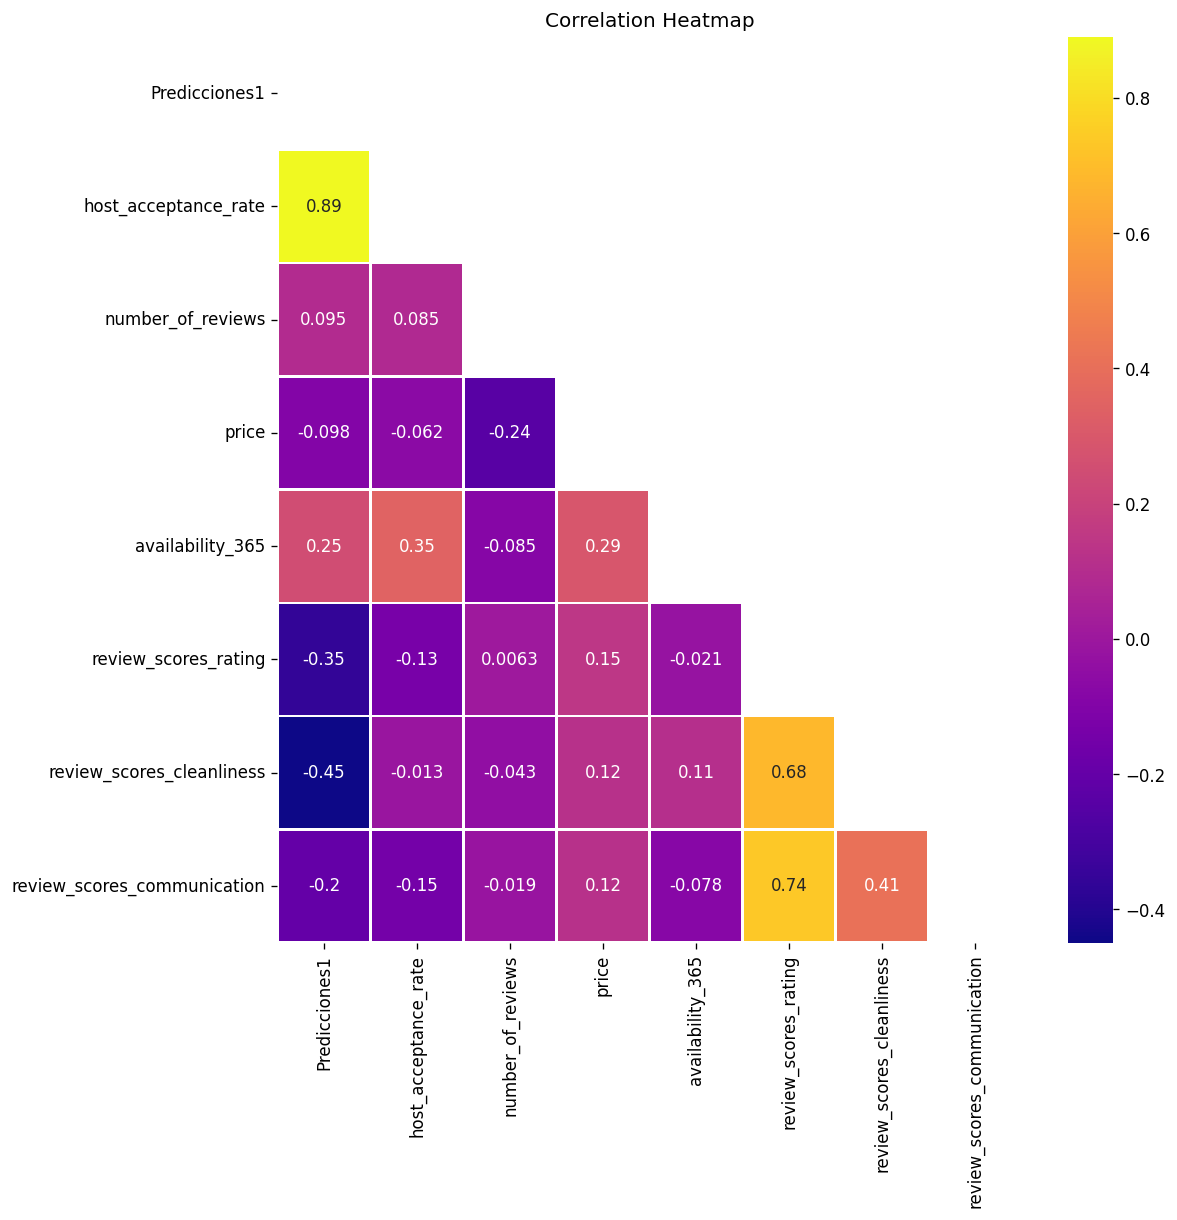

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

# **ANALISIS DE REGRESIÓN LINEAL MULTIPLE**
Amsterdam

## **LIBRERÍAS**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **EXPLORACIÓN Y LIMPIEZA**

In [ ]:
df= pd.read_csv("amsterdam.csv",encoding="ISO-8859-1")
#df['host_acceptance_rate '] = pd.to_numeric(df['host_acceptance_rate'])
#df = df.select_dtypes(include = ["number"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6893 non-null   float64
 1   listing_url                                   6893 non-null   object 
 2   scrape_id                                     6893 non-null   float64
 3   last_scraped                                  6893 non-null   object 
 4   source                                        6893 non-null   object 
 5   name                                          6893 non-null   object 
 6   description                                   6877 non-null   object 
 7   neighborhood_overview                         4628 non-null   object 
 8   picture_url                                   6893 non-null   object 
 9   host_id                                       6893 non-null   i

In [ ]:
df['room_type'].unique()


array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
df2=df.copy()
df2=df2.fillna(round(df.mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
valores_nulos=df2.isnull().sum().sum()
valores_nulos


35970

AxesSubplot(0.125,0.125;0.775x0.755)


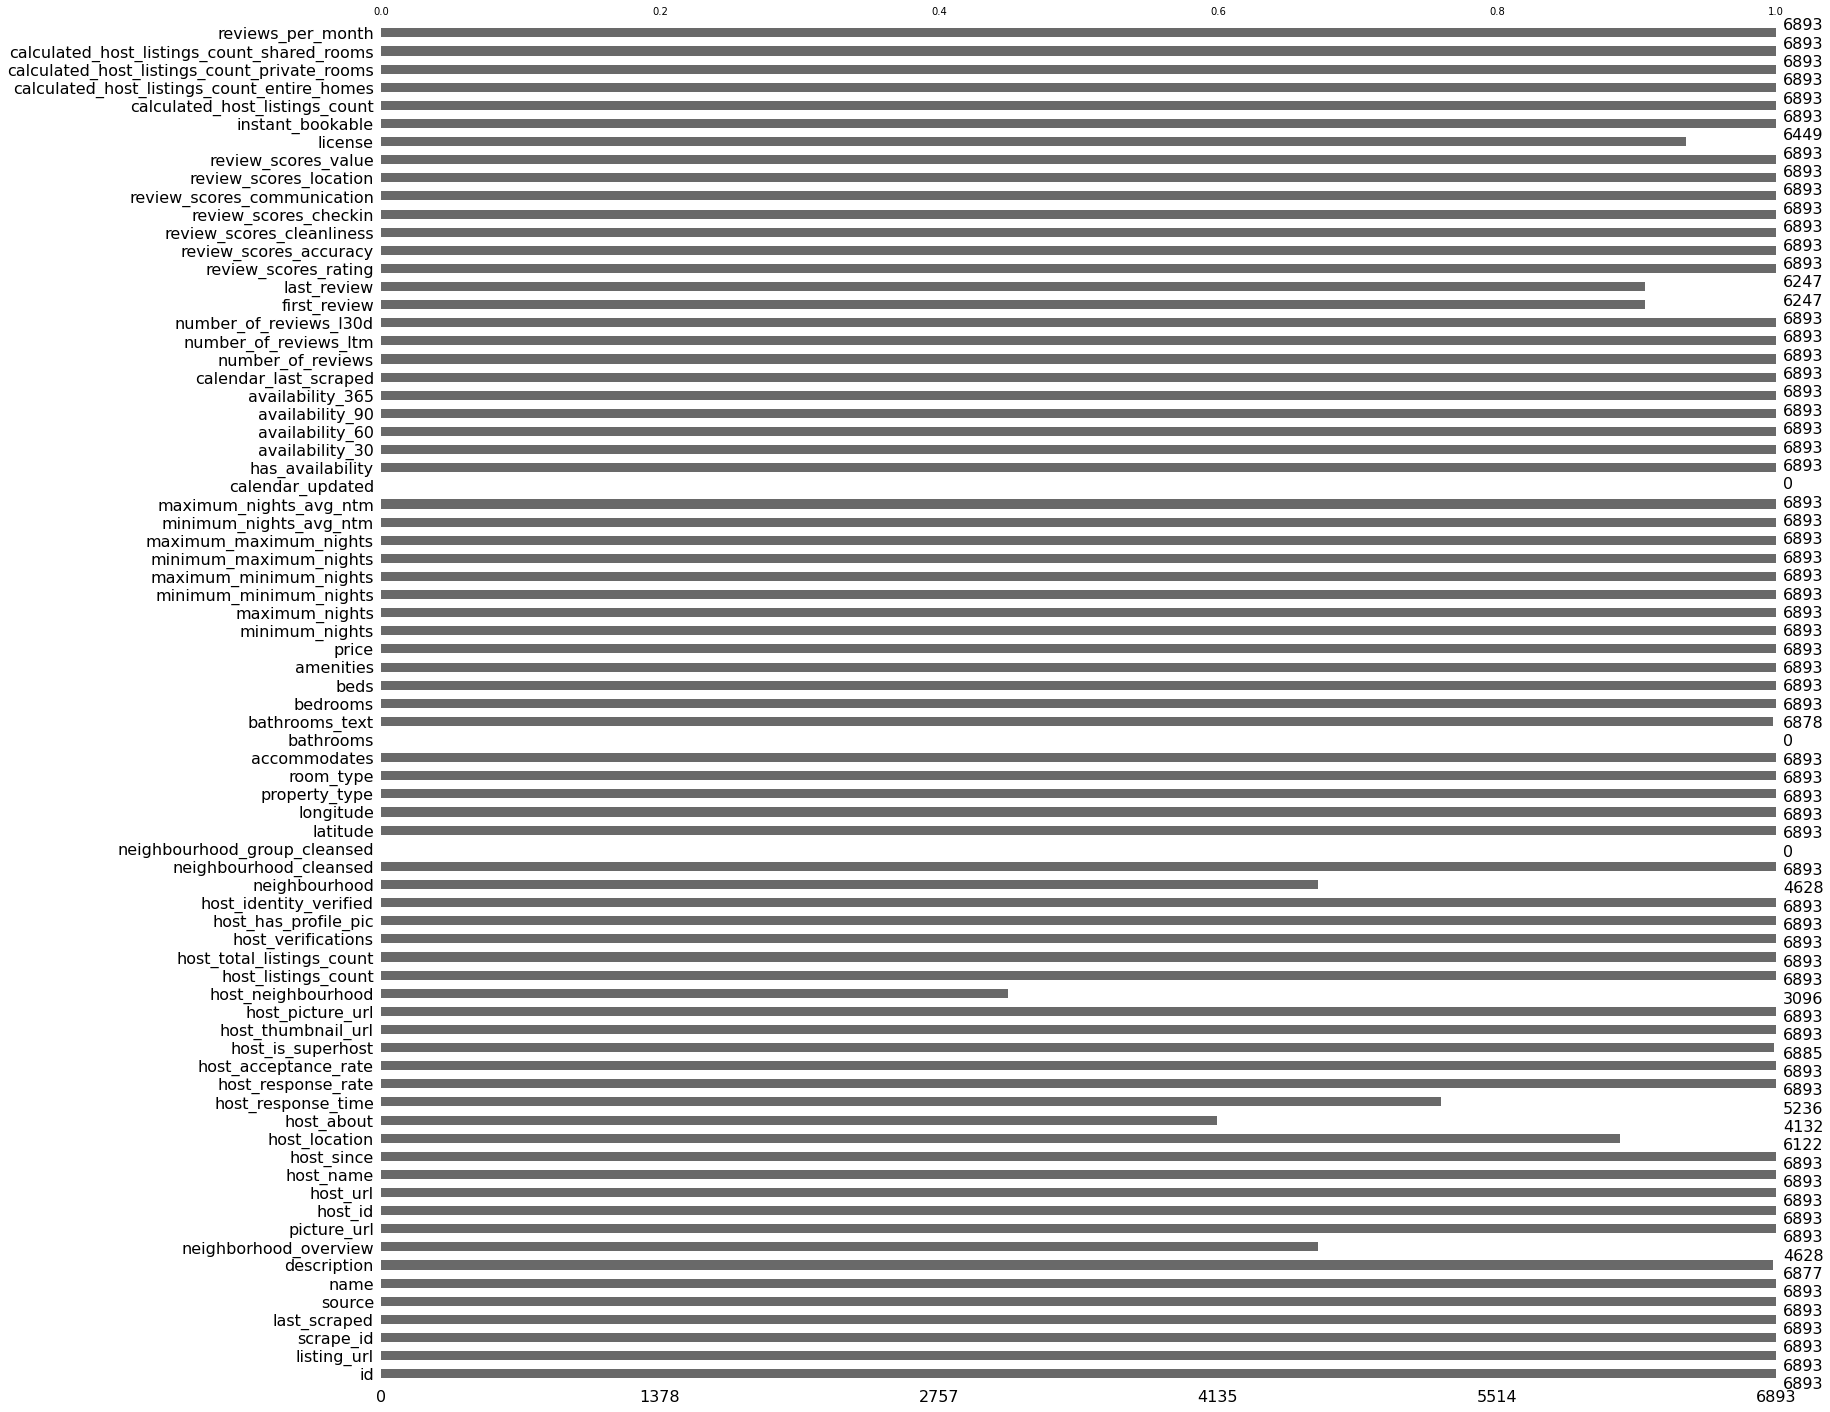

In [ ]:
print(msno.bar(df2))

## **ENTIRE HOME APT**

In [ ]:
df_clean=df2[df2['room_type']=='Entire home/apt']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 5 to 6892
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         4922 non-null   float64
 1   number_of_reviews            4922 non-null   int64  
 2   price                        4922 non-null   float64
 3   availability_365             4922 non-null   int64  
 4   review_scores_rating         4922 non-null   float64
 5   review_scores_cleanliness    4922 non-null   float64
 6   review_scores_communication  4922 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 307.6 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate             2.665
number_of_reviews              140.500
price                          924.000
availability_365               489.500
review_scores_rating             5.900
review_scores_cleanliness        6.440
review_scores_communication      5.450
dtype: float64
Limite inferior permitido host_acceptance_rate            -1.035
number_of_reviews             -109.500
price                         -496.000
availability_365              -400.500
review_scores_rating             3.900
review_scores_cleanliness        3.240
review_scores_communication      4.450
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews  price  availability_365  \
5                     1.00               44.0  240.0                 0   
6                     0.92                NaN  245.0               165   
8                     0.50               63.0  250.0                 0   
9                     0.00               95.0  149.0                 9   
10                    0.33               36.0  120.0                 0   
...                    ...                ...    ...               ...   
6888                  1.00               28.0  300.0                 0   
6889                  0.50               18.0  195.0                 0   
6890                  1.00               21.0  449.0                 0   
6891                  0.00                8.0  282.0                 0   
6892                  0.36               22.0  200.0                 0   

      review_scores_rating  review_scores_cleanliness  \
5                     4.72                       4.45   
6                     4.92                       4.91   
8                     4.95                       4.92   
9                     4.86                       4.86   
10                    4.91                       4.88   
...                    ...                        ...   
6888                  4.73                       4.69   
6889                  5.00                       4.94   
6890                  4.90                       4.90   
6891                  5.00                       5.00   
6892                  4.86                       4.86   

      review_scores_communication  
5                            4.90  
6                            4.97  
8                            4.98  
9                            4.98  
10                           4.94  
...                           ...  
6888                         4.68  
6889                         5.00  
6890                         4.71  
6891                         5.00  
6892                         4.86  

[4922 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

366

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews  price  availability_365  \
5                     1.00               44.0  240.0                 0   
6                     0.92               18.3  245.0               165   
8                     0.50               63.0  250.0                 0   
9                     0.00               95.0  149.0                 9   
10                    0.33               36.0  120.0                 0   
...                    ...                ...    ...               ...   
6888                  1.00               28.0  300.0                 0   
6889                  0.50               18.0  195.0                 0   
6890                  1.00               21.0  449.0                 0   
6891                  0.00                8.0  282.0                 0   
6892                  0.36               22.0  200.0                 0   

      review_scores_rating  review_scores_cleanliness  \
5                     4.72                       4.45   
6                     4.92                       4.91   
8                     4.95                       4.92   
9                     4.86                       4.86   
10                    4.91                       4.88   
...                    ...                        ...   
6888                  4.73                       4.69   
6889                  5.00                       4.94   
6890                  4.90                       4.90   
6891                  5.00                       5.00   
6892                  4.86                       4.86   

      review_scores_communication  
5                            4.90  
6                            4.97  
8                            4.98  
9                            4.98  
10                           4.94  
...                           ...  
6888                         4.68  
6889                         5.00  
6890                         4.71  
6891                         5.00  
6892                         4.86  

[4922 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 5 to 6892
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         4922 non-null   float64
 1   number_of_reviews            4922 non-null   float64
 2   price                        4922 non-null   float64
 3   availability_365             4922 non-null   int64  
 4   review_scores_rating         4922 non-null   float64
 5   review_scores_cleanliness    4922 non-null   float64
 6   review_scores_communication  4922 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 307.6 KB


### **Regresión Lineal**



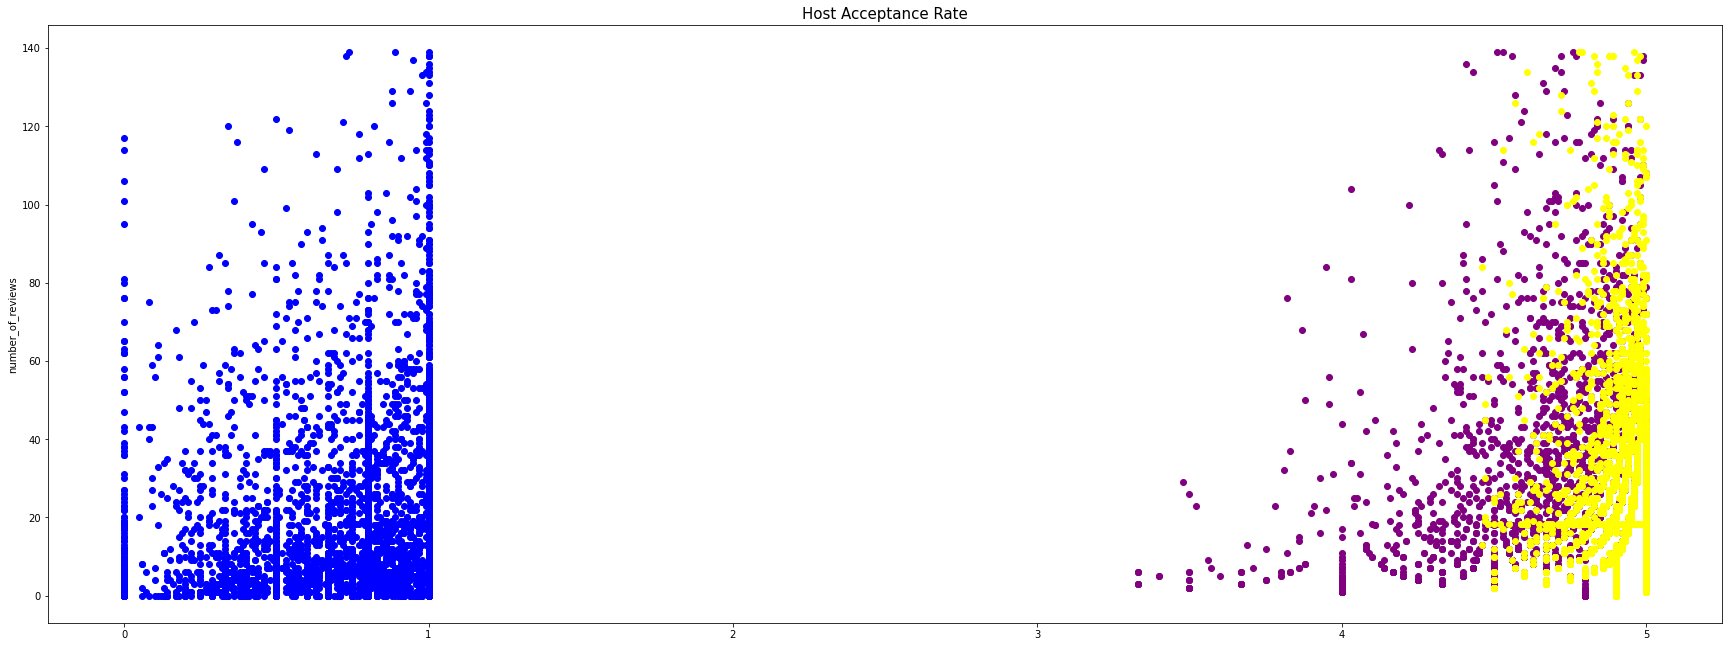

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)

ax1.set_ylabel(r'number_of_reviews')

ax1.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)

ax1.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']]


Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()


In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)


LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))


Modelo 1:  0.02047555366467768


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']])




In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)


df

Predicciones1  host_acceptance_rate  number_of_reviews  price  \
5         20.503341                  1.00               44.0  240.0   
6         17.836216                  0.92               18.3  245.0   
8         15.544120                  0.50               63.0  250.0   
9         13.202168                  0.00               95.0  149.0   
10        15.959925                  0.33               36.0  120.0   
...             ...                   ...                ...    ...   
6888      27.032857                  1.00               28.0  300.0   
6889      14.934072                  0.50               18.0  195.0   
6890      26.046954                  1.00               21.0  449.0   
6891      12.544900                  0.00                8.0  282.0   
6892      18.518441                  0.36               22.0  200.0   

      availability_365  review_scores_rating  review_scores_cleanliness  \
5                    0                  4.72                       4.45   
6                  165                  4.92                       4.91   
8                    0                  4.95                       4.92   
9                    9                  4.86                       4.86   
10                   0                  4.91                       4.88   
...                ...                   ...                        ...   
6888                 0                  4.73                       4.69   
6889                 0                  5.00                       4.94   
6890                 0                  4.90                       4.90   
6891                 0                  5.00                       5.00   
6892                 0                  4.86                       4.86   

      review_scores_communication  
5                            4.90  
6                            4.97  
8                            4.98  
9                            4.98  
10                           4.94  
...                           ...  
6888                         4.68  
6889                         5.00  
6890                         4.71  
6891                         5.00  
6892                         4.86  

[4922 rows x 8 columns]

Text(0, 0.5, 'number_of_reviews')

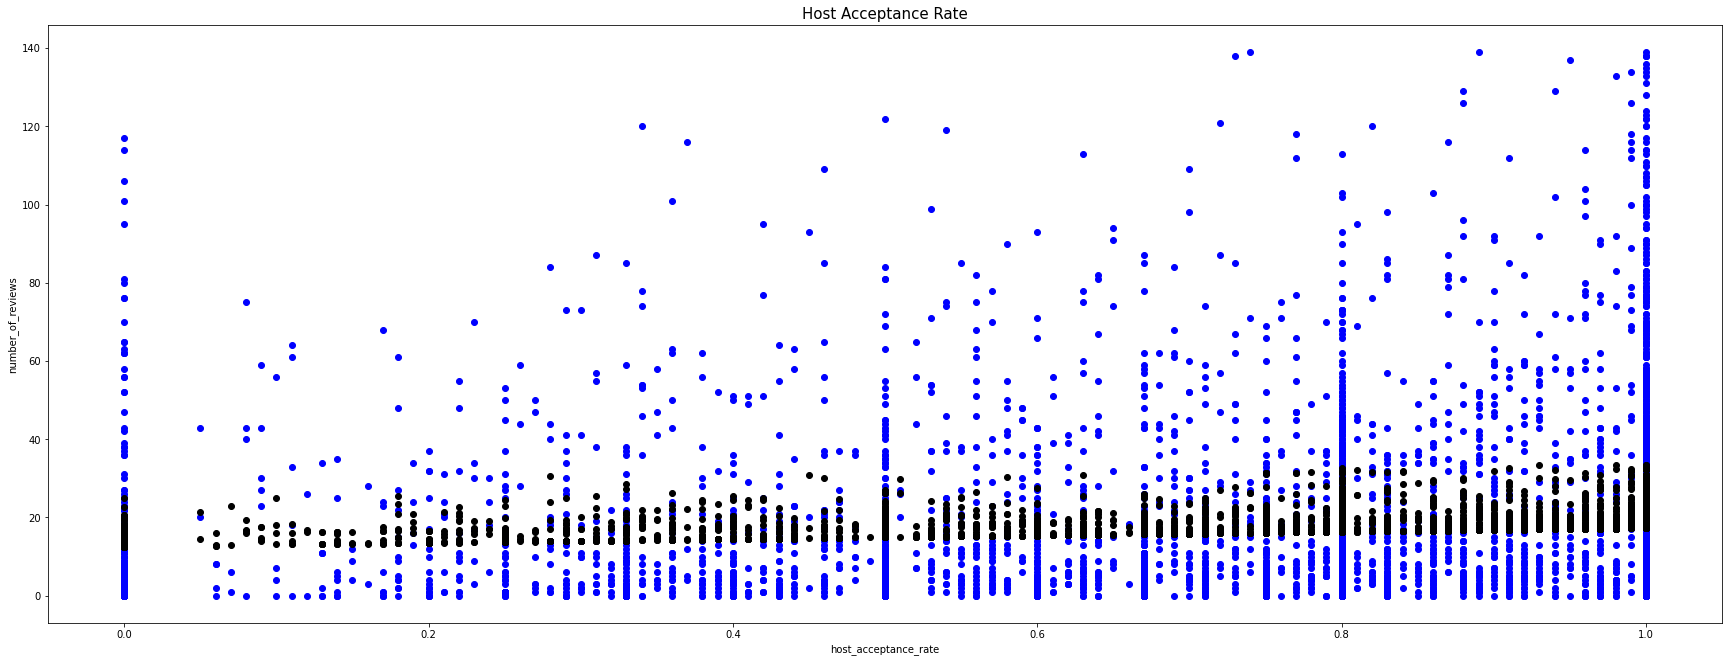

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)

print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)


Coeficientes de determinación
Modelo 1:  0.02047555366467768


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)

print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)


Coeficientes de correlación
Modelo 1:  0.14309281486041736


Text(0.5, 1.0, 'Correlation Heatmap')

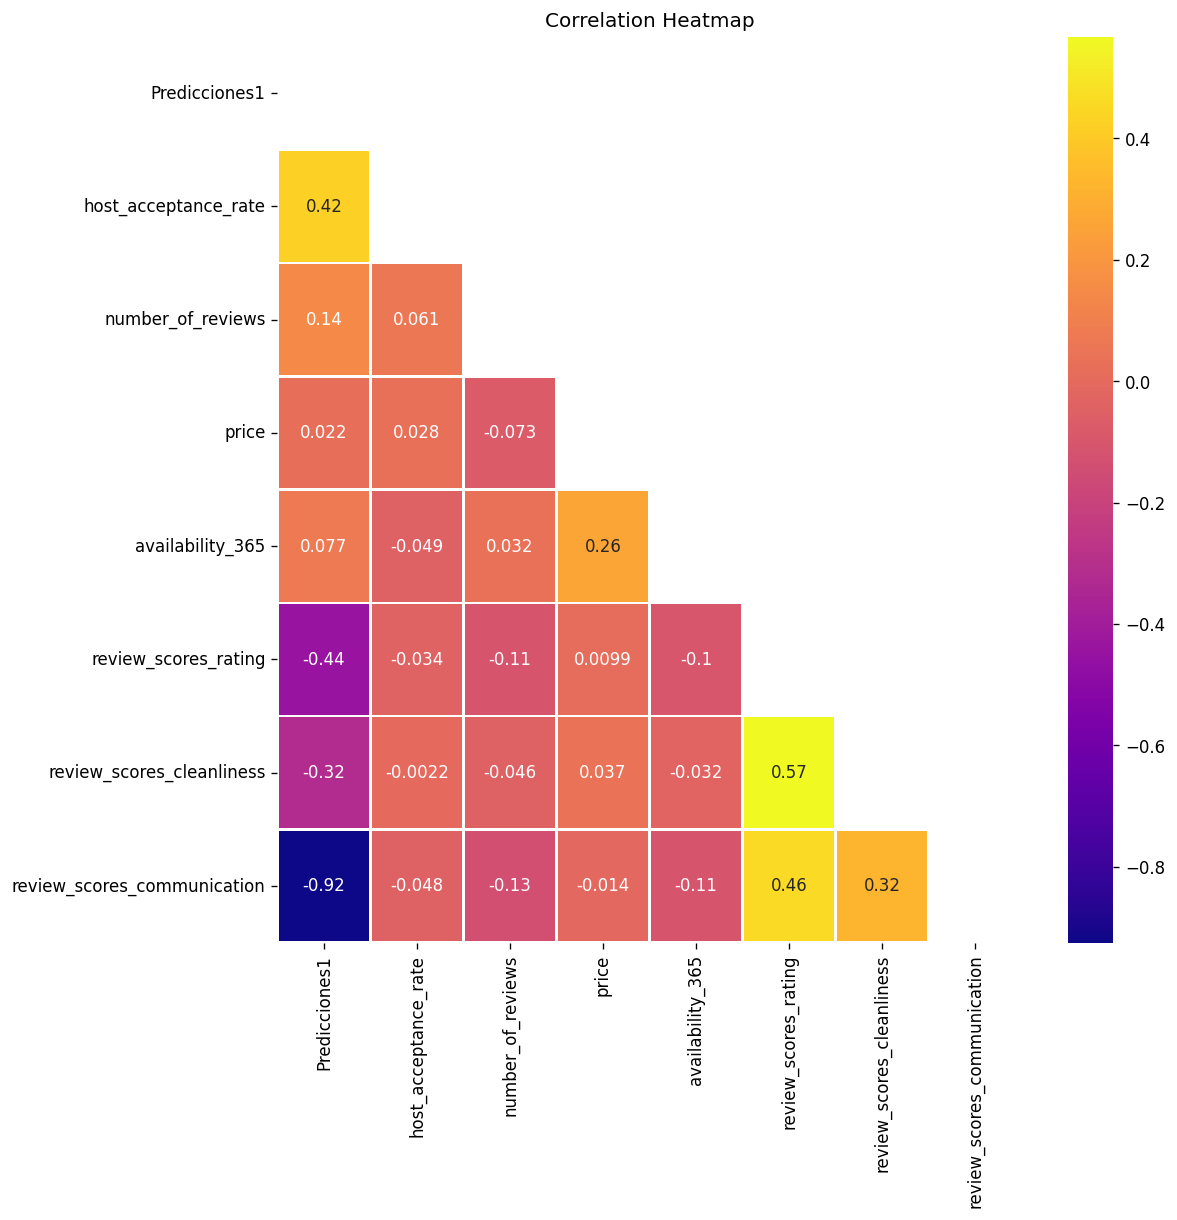

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')





## **PRIVATE ROOM**

In [ ]:
df_clean=df2[df2['room_type']=='Private room']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 0 to 6884
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         1859 non-null   float64
 1   number_of_reviews            1859 non-null   int64  
 2   price                        1859 non-null   float64
 3   availability_365             1859 non-null   int64  
 4   review_scores_rating         1859 non-null   float64
 5   review_scores_cleanliness    1859 non-null   float64
 6   review_scores_communication  1859 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 116.2 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.495
number_of_reviews               788.750
price                           666.000
availability_365               1420.500
review_scores_rating              6.045
review_scores_cleanliness         6.155
review_scores_communication       5.700
dtype: float64
Limite inferior permitido host_acceptance_rate              0.395
number_of_reviews              -616.250
price                          -374.000
availability_365              -1129.500
review_scores_rating              3.545
review_scores_cleanliness         3.455
review_scores_communication       4.100
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews  price  availability_365  \
0                     1.00              305.0   49.0                14   
1                     0.98              339.0  106.0                 0   
2                     1.00              231.0  136.0               121   
3                     1.00              428.0   75.0               117   
4                     1.00              582.0   55.0               160   
...                    ...                ...    ...               ...   
6861                  0.86               25.0  125.0                 0   
6862                  1.00               32.0   65.0                 0   
6876                  1.00               16.0   91.0                53   
6877                  1.00               13.0   86.0                36   
6884                  0.93              298.0   75.0                 0   

      review_scores_rating  review_scores_cleanliness  \
0                     4.89                       5.00   
1                     4.44                       4.79   
2                     4.94                       4.95   
3                     4.88                       4.89   
4                     4.79                       4.84   
...                    ...                        ...   
6861                  4.96                       5.00   
6862                  4.91                       5.00   
6876                  4.81                       4.63   
6877                  4.85                       4.46   
6884                  4.78                       4.79   

      review_scores_communication  
0                            4.98  
1                            4.62  
2                            4.92  
3                            4.94  
4                            4.92  
...                           ...  
6861                         5.00  
6862                         4.97  
6876                         4.69  
6877                         4.85  
6884                         4.90  

[1859 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

128

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews  price  availability_365  \
0                     1.00              305.0   49.0                14   
1                     0.98              339.0  106.0                 0   
2                     1.00              231.0  136.0               121   
3                     1.00              428.0   75.0               117   
4                     1.00              582.0   55.0               160   
...                    ...                ...    ...               ...   
6861                  0.86               25.0  125.0                 0   
6862                  1.00               32.0   65.0                 0   
6876                  1.00               16.0   91.0                53   
6877                  1.00               13.0   86.0                36   
6884                  0.93              298.0   75.0                 0   

      review_scores_rating  review_scores_cleanliness  \
0                     4.89                       5.00   
1                     4.44                       4.79   
2                     4.94                       4.95   
3                     4.88                       4.89   
4                     4.79                       4.84   
...                    ...                        ...   
6861                  4.96                       5.00   
6862                  4.91                       5.00   
6876                  4.81                       4.63   
6877                  4.85                       4.46   
6884                  4.78                       4.79   

      review_scores_communication  
0                            4.98  
1                            4.62  
2                            4.92  
3                            4.94  
4                            4.92  
...                           ...  
6861                         5.00  
6862                         4.97  
6876                         4.69  
6877                         4.85  
6884                         4.90  

[1859 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 0 to 6884
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         1859 non-null   float64
 1   number_of_reviews            1859 non-null   float64
 2   price                        1859 non-null   float64
 3   availability_365             1859 non-null   int64  
 4   review_scores_rating         1859 non-null   float64
 5   review_scores_cleanliness    1859 non-null   float64
 6   review_scores_communication  1859 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 116.2 KB


### **Regresión Lineal**



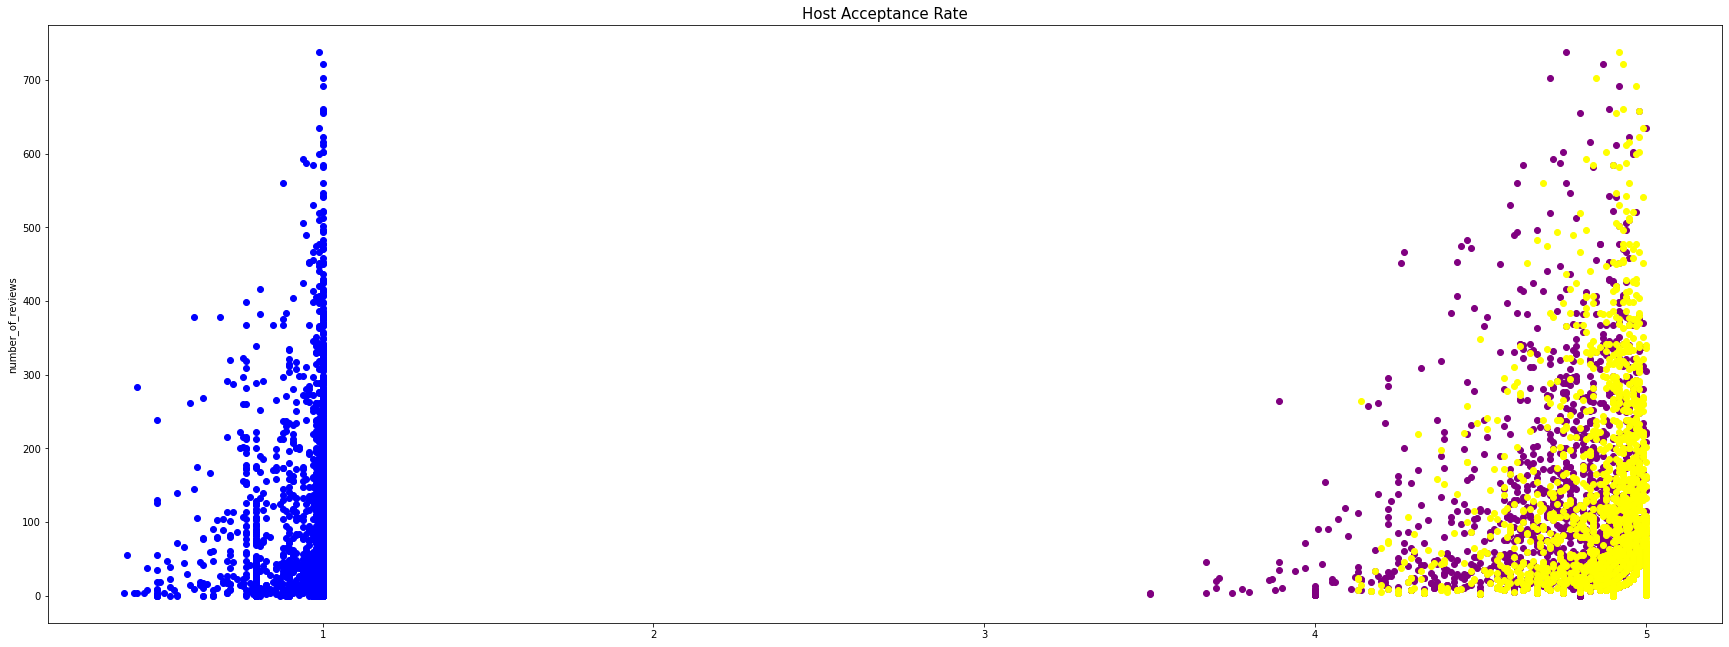

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)

ax1.set_ylabel(r'number_of_reviews')

ax1.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)

ax1.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']]


Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()


In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)


LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))


Modelo 1:  0.027681614481292027


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']])




In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)


df

Predicciones1  host_acceptance_rate  number_of_reviews  price  \
0        129.564530                  1.00              305.0   49.0   
1        113.425211                  0.98              339.0  106.0   
2        126.905830                  1.00              231.0  136.0   
3        124.838739                  1.00              428.0   75.0   
4        122.668452                  1.00              582.0   55.0   
...             ...                   ...                ...    ...   
6861     104.230283                  0.86               25.0  125.0   
6862     129.442427                  1.00               32.0   65.0   
6876     111.770539                  1.00               16.0   91.0   
6877     107.175514                  1.00               13.0   86.0   
6884     107.708938                  0.93              298.0   75.0   

      availability_365  review_scores_rating  review_scores_cleanliness  \
0                   14                  4.89                       5.00   
1                    0                  4.44                       4.79   
2                  121                  4.94                       4.95   
3                  117                  4.88                       4.89   
4                  160                  4.79                       4.84   
...                ...                   ...                        ...   
6861                 0                  4.96                       5.00   
6862                 0                  4.91                       5.00   
6876                53                  4.81                       4.63   
6877                36                  4.85                       4.46   
6884                 0                  4.78                       4.79   

      review_scores_communication  
0                            4.98  
1                            4.62  
2                            4.92  
3                            4.94  
4                            4.92  
...                           ...  
6861                         5.00  
6862                         4.97  
6876                         4.69  
6877                         4.85  
6884                         4.90  

[1859 rows x 8 columns]

Text(0, 0.5, 'number_of_reviews')

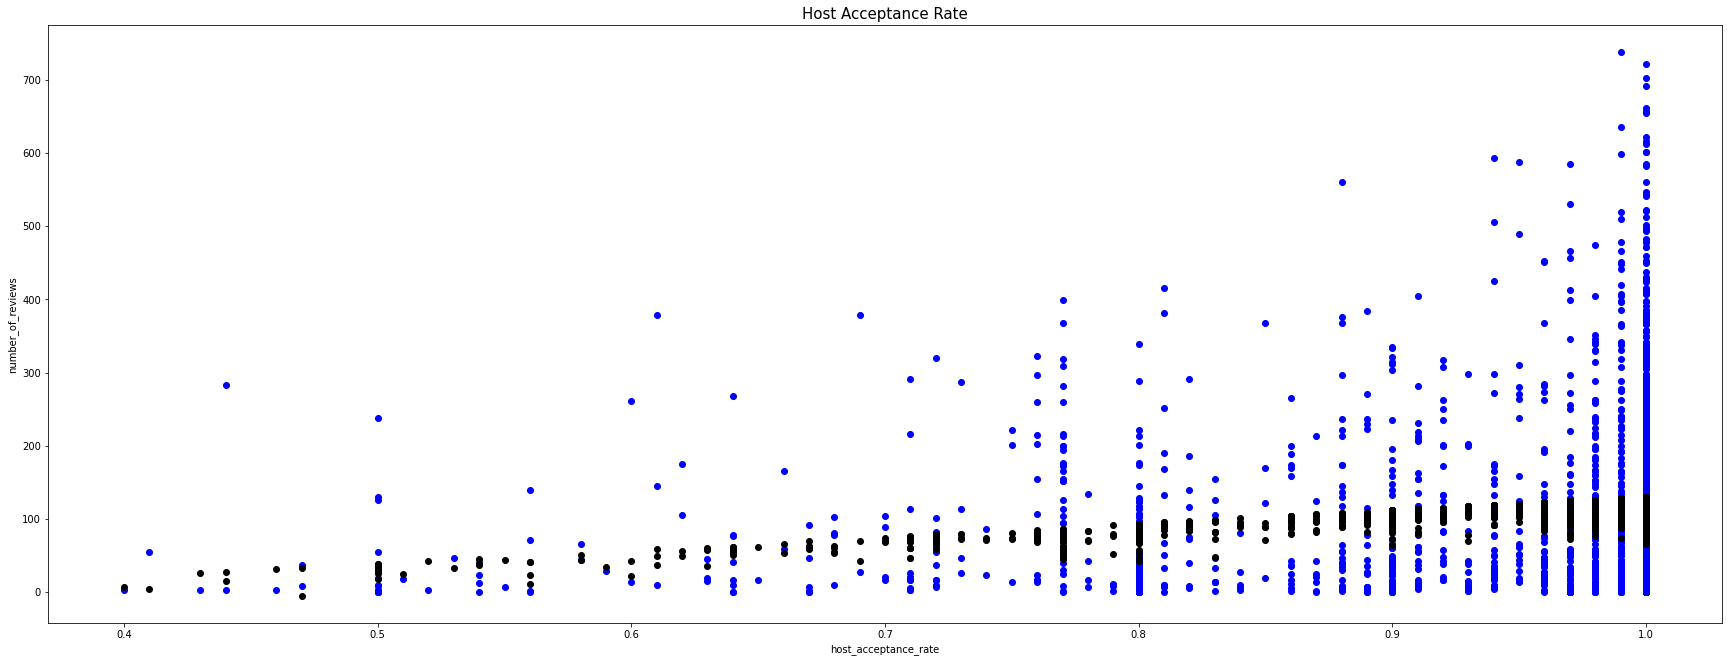

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)

print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)


Coeficientes de determinación
Modelo 1:  0.027681614481292027


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)

print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)


Coeficientes de correlación
Modelo 1:  0.16637792666484347


Text(0.5, 1.0, 'Correlation Heatmap')

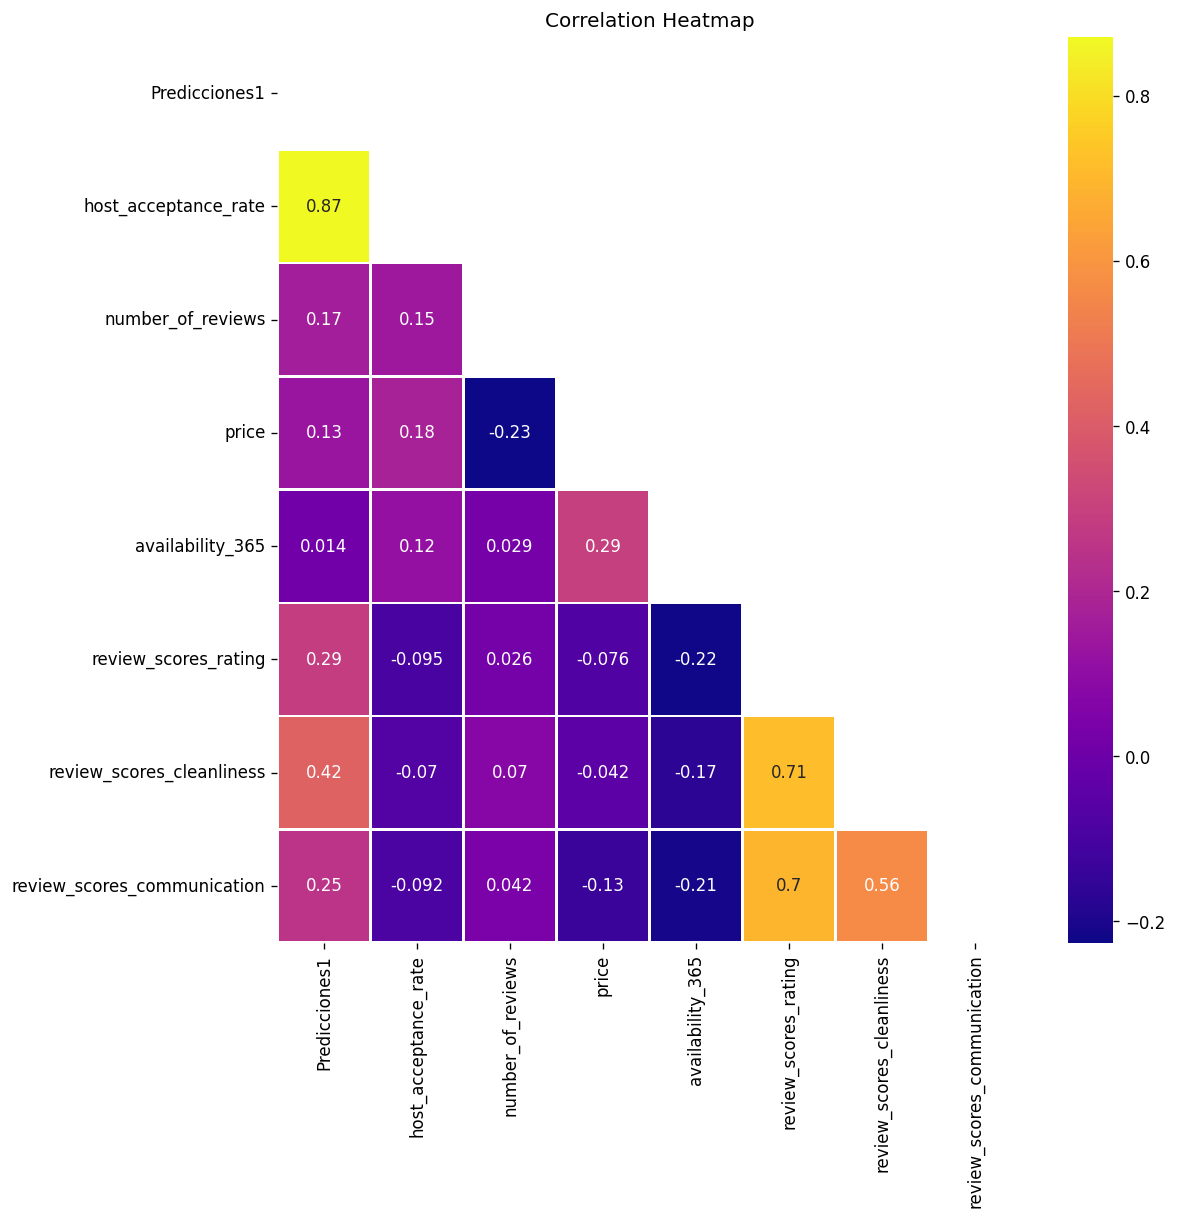

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')





## **HOTEL ROOM**

In [ ]:
df_clean=df2[df2['room_type']=='Hotel room']
df_clean=df_clean[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 108 to 4633
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         75 non-null     float64
 1   number_of_reviews            75 non-null     int64  
 2   price                        75 non-null     float64
 3   availability_365             75 non-null     int64  
 4   review_scores_rating         75 non-null     float64
 5   review_scores_cleanliness    75 non-null     float64
 6   review_scores_communication  75 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 4.7 KB


### **PROCEDIMIENTO "Rango Intercuartílico" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_clean
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate              1.0450
number_of_reviews               391.5000
price                           975.2500
availability_365               1402.5000
review_scores_rating              6.1100
review_scores_cleanliness         6.3050
review_scores_communication       5.9825
dtype: float64
Limite inferior permitido host_acceptance_rate              0.9450
number_of_reviews              -298.5000
price                          -589.7500
availability_365              -1147.5000
review_scores_rating              3.3100
review_scores_cleanliness         3.2050
review_scores_communication       3.6325
dtype: float64


In [ ]:
#Obtenemos datos limpios del Dataframe (Con esta acción los outliers se convierten en datos nulos "NaN")
df3= df_clean[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

host_acceptance_rate  number_of_reviews  price  availability_365  \
108                   1.00                NaN  113.0                88   
109                   1.00                NaN  125.0                95   
278                   1.00              321.0   82.0               244   
478                   1.00               71.0   98.0               347   
480                   1.00               93.0  122.0               346   
...                    ...                ...    ...               ...   
4533                  0.96                0.0    0.0                 0   
4534                   NaN                0.0    0.0                 0   
4587                  1.00                7.0    0.0                 0   
4631                   NaN                4.0  315.0               133   
4633                   NaN                0.0  293.0               133   

      review_scores_rating  review_scores_cleanliness  \
108                   4.85                       4.89   
109                   4.88                       4.92   
278                   4.51                       4.49   
478                   4.62                       4.67   
480                   4.41                       4.42   
...                    ...                        ...   
4533                  4.80                       4.80   
4534                  4.80                       4.80   
4587                  5.00                       5.00   
4631                  4.75                       4.50   
4633                  4.80                       4.80   

      review_scores_communication  
108                          4.94  
109                          4.96  
278                          4.80  
478                          4.46  
480                          4.22  
...                           ...  
4533                         4.90  
4534                         4.90  
4587                         4.86  
4631                         5.00  
4633                         4.90  

[75 rows x 7 columns]

In [ ]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

9

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" (Este método solo es para variables cuantitativas,
#para el caso de variables cualitativas utilizar "bfill" o "ffill")

#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

host_acceptance_rate  number_of_reviews  price  availability_365  \
108                   1.00               56.5  113.0                88   
109                   1.00               56.5  125.0                95   
278                   1.00              321.0   82.0               244   
478                   1.00               71.0   98.0               347   
480                   1.00               93.0  122.0               346   
...                    ...                ...    ...               ...   
4533                  0.96                0.0    0.0                 0   
4534                  1.00                0.0    0.0                 0   
4587                  1.00                7.0    0.0                 0   
4631                  1.00                4.0  315.0               133   
4633                  1.00                0.0  293.0               133   

      review_scores_rating  review_scores_cleanliness  \
108                   4.85                       4.89   
109                   4.88                       4.92   
278                   4.51                       4.49   
478                   4.62                       4.67   
480                   4.41                       4.42   
...                    ...                        ...   
4533                  4.80                       4.80   
4534                  4.80                       4.80   
4587                  5.00                       5.00   
4631                  4.75                       4.50   
4633                  4.80                       4.80   

      review_scores_communication  
108                          4.94  
109                          4.96  
278                          4.80  
478                          4.46  
480                          4.22  
...                           ...  
4533                         4.90  
4534                         4.90  
4587                         4.86  
4631                         5.00  
4633                         4.90  

[75 rows x 7 columns]

In [ ]:

df4.info()
df_clean=df4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 108 to 4633
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         75 non-null     float64
 1   number_of_reviews            75 non-null     float64
 2   price                        75 non-null     float64
 3   availability_365             75 non-null     int64  
 4   review_scores_rating         75 non-null     float64
 5   review_scores_cleanliness    75 non-null     float64
 6   review_scores_communication  75 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.7 KB


### **Regresión Lineal**



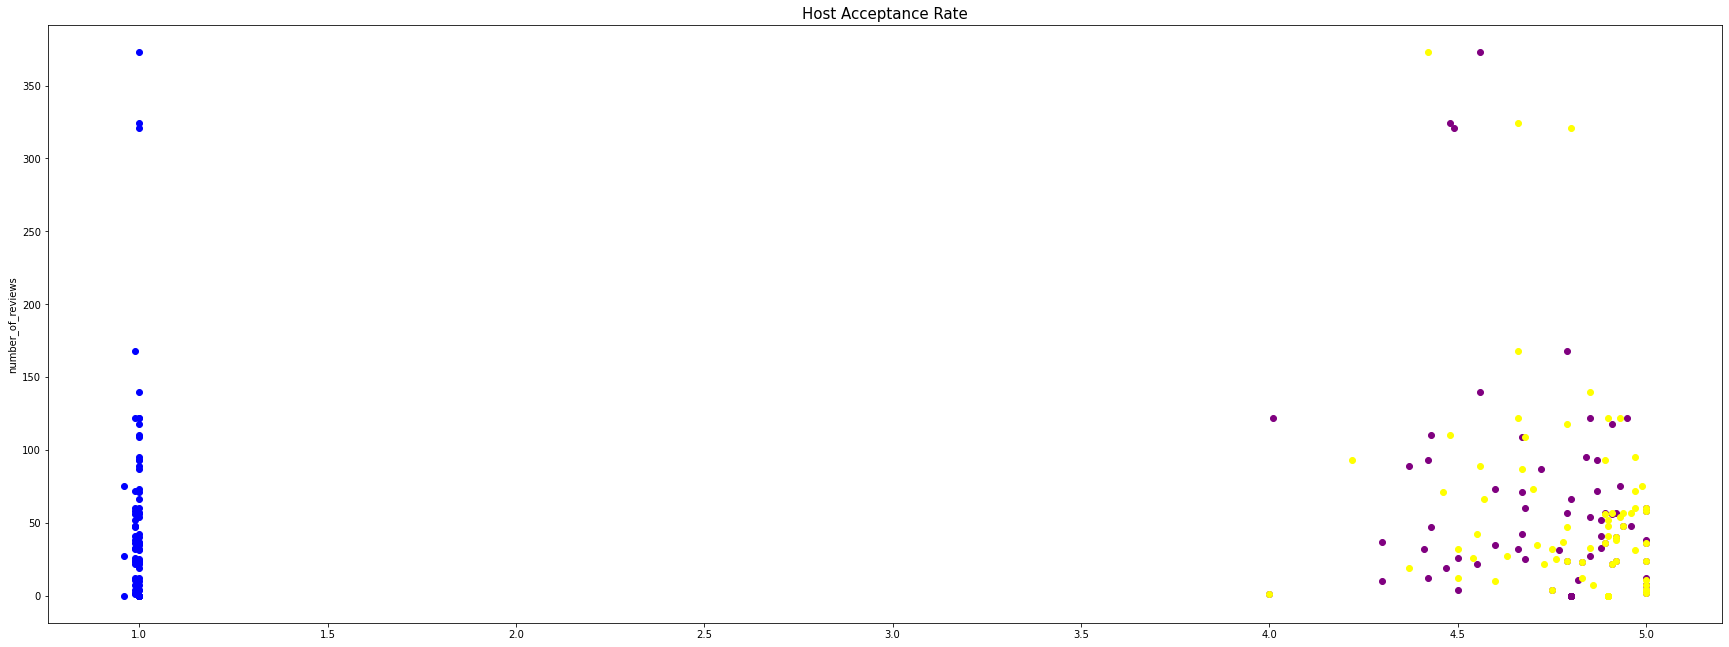

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df_clean)

ax1.set_ylabel(r'number_of_reviews')

ax1.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=df_clean)

ax1.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=df_clean)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
df=df_clean
Vars_Indep1= df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']]


Var_Dep= df['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()


In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)


LinearRegression()

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))


Modelo 1:  0.06908917023911265


MODELO PREDICTIVO 

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model1.predict(X=df[['host_acceptance_rate','review_scores_cleanliness','review_scores_communication']])




In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)


df

Predicciones1  host_acceptance_rate  number_of_reviews  price  \
108       48.994839                  1.00               56.5  113.0   
109       47.098634                  1.00               56.5  125.0   
278       67.831007                  1.00              321.0   82.0   
478       79.865004                  1.00               71.0   98.0   
480       99.398940                  1.00               93.0  122.0   
...             ...                   ...                ...    ...   
4533      20.288277                  0.96                0.0    0.0   
4534      53.665576                  1.00                0.0    0.0   
4587      49.845829                  1.00                7.0    0.0   
4631      57.359436                  1.00                4.0  315.0   
4633      53.665576                  1.00                0.0  293.0   

      availability_365  review_scores_rating  review_scores_cleanliness  \
108                 88                  4.85                       4.89   
109                 95                  4.88                       4.92   
278                244                  4.51                       4.49   
478                347                  4.62                       4.67   
480                346                  4.41                       4.42   
...                ...                   ...                        ...   
4533                 0                  4.80                       4.80   
4534                 0                  4.80                       4.80   
4587                 0                  5.00                       5.00   
4631               133                  4.75                       4.50   
4633               133                  4.80                       4.80   

      review_scores_communication  
108                          4.94  
109                          4.96  
278                          4.80  
478                          4.46  
480                          4.22  
...                           ...  
4533                         4.90  
4534                         4.90  
4587                         4.86  
4631                         5.00  
4633                         4.90  

[75 rows x 8 columns]

Text(0, 0.5, 'number_of_reviews')

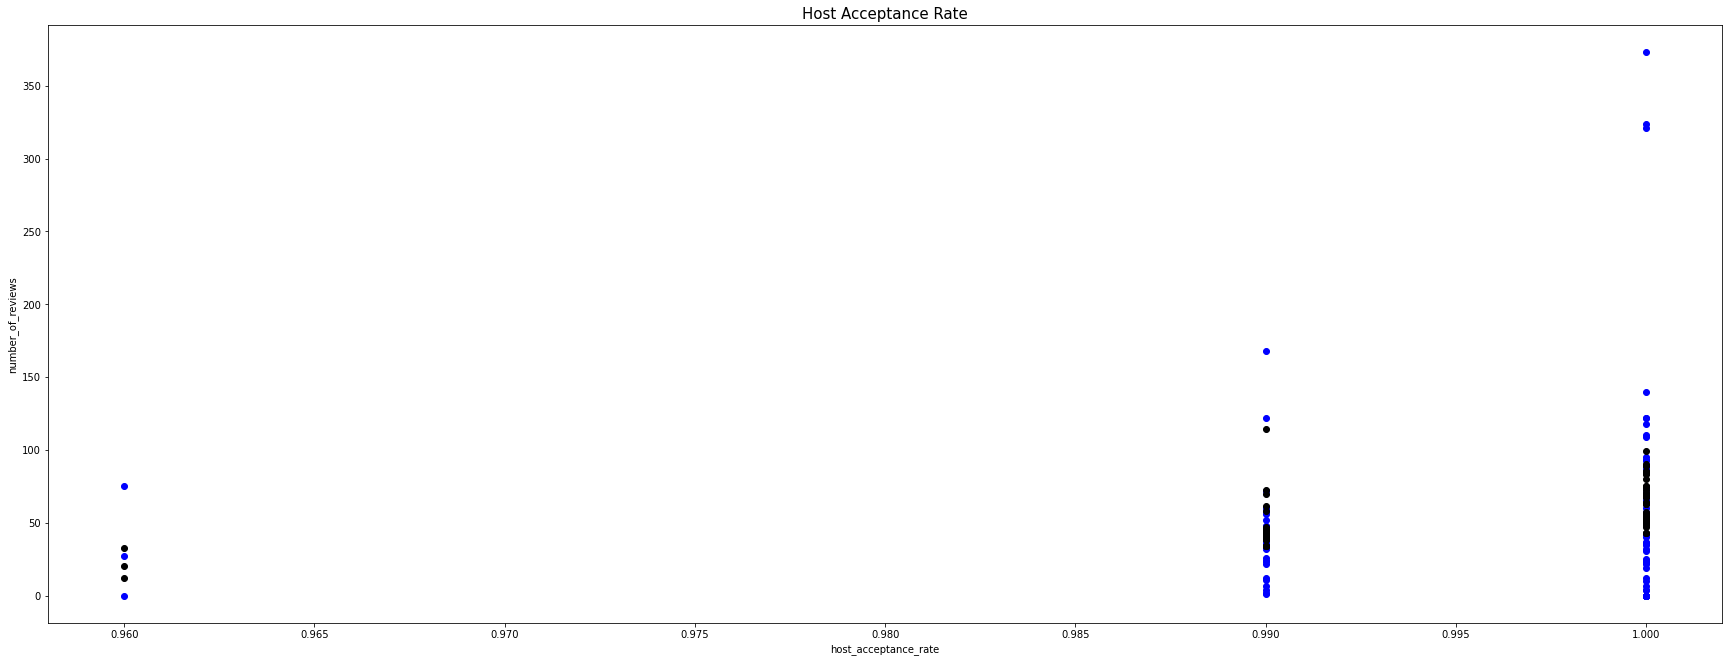

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(1,1,1)


ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=df)
ax1.scatter(x='host_acceptance_rate', y='Predicciones1', c='black', data=df)

ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)

print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)


Coeficientes de determinación
Modelo 1:  0.06908917023911265


In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)

print('Coeficientes de correlación')

print('Modelo 1: ',coef_Correl1)


Coeficientes de correlación
Modelo 1:  0.2628481885787168


Text(0.5, 1.0, 'Correlation Heatmap')

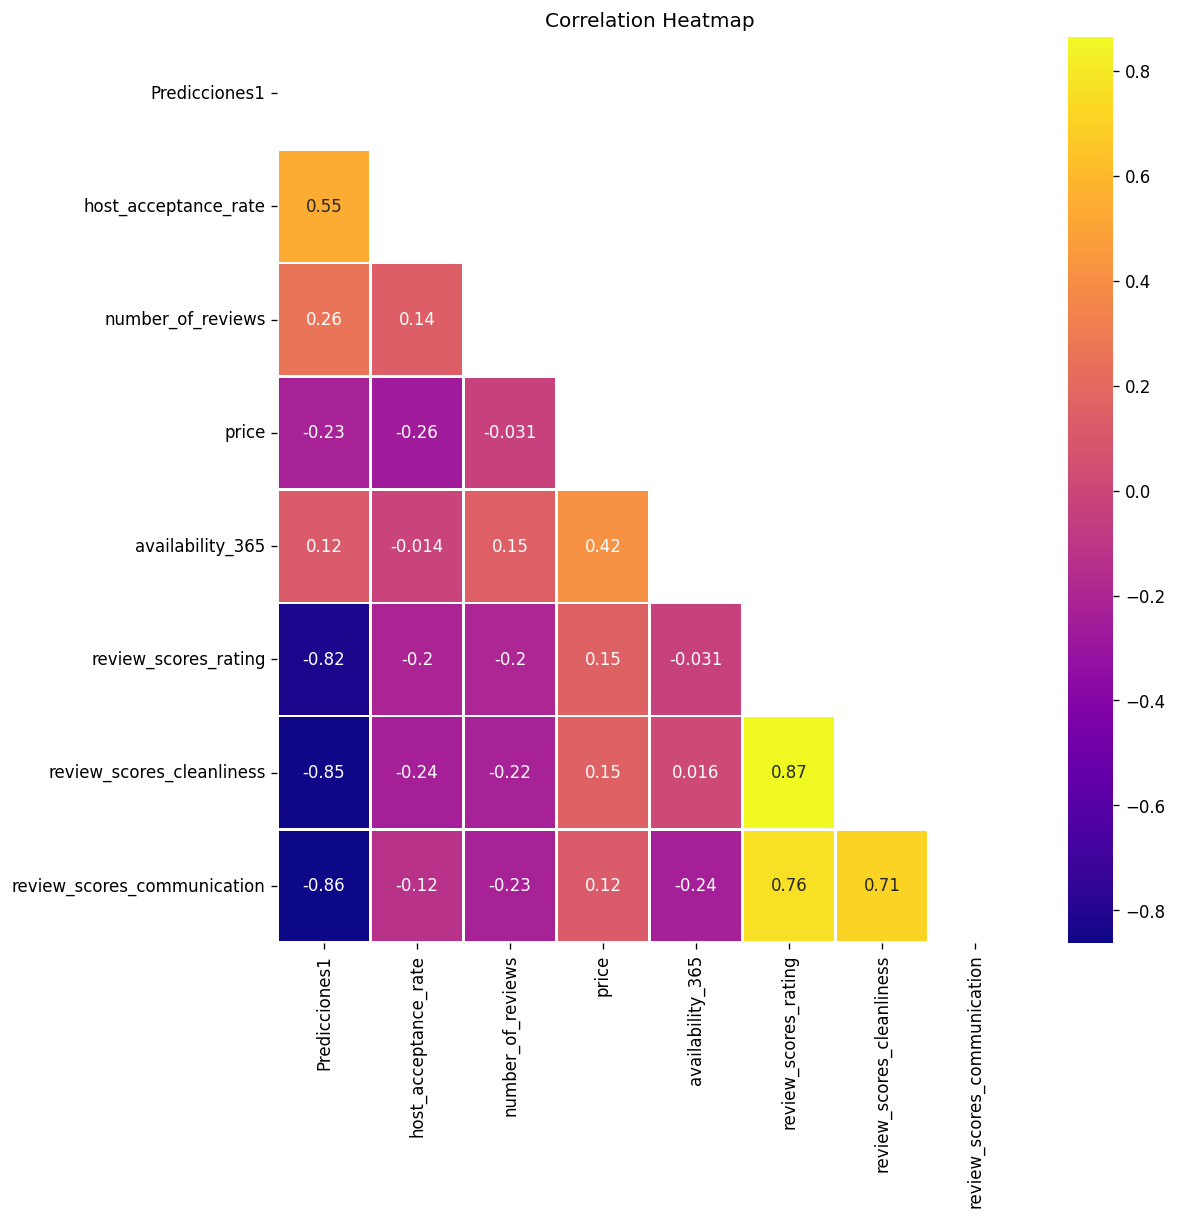

In [ ]:
# Correlaciones
plt.figure(dpi=120, figsize=(10,10)) # resolution
mask = np.triu(np.ones_like(df_clean.corr(),dtype = bool))

sns.heatmap(df.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')